===================================================================================================================



#Risk Factor Prediction of Chronic Kidney Disease


Define the data
---------------

In [ ]:
'''
Variable      Name	Role	  Type	        Description	                    Units
=================================================================================
age	          Feature	      Integer	      Age		                          year
bp	          Feature	      Integer		    blood pressure	                mm/Hg
sg	          Feature	      Categorical		specific gravity
al	          Feature	      Categorical		albumin
su	          Feature	      Categorical		sugar
rbc	          Feature	      Binary		    red blood cells
pc	          Feature	      Binary		    pus cell
pcc	          Feature	      Binary		    pus cell clumps
ba	          Feature	      Binary		    bacteria
bgr	          Feature	      Integer	    	blood glucose random	          mgs/dl
bu	          Feature	      Integer		    blood urea	                    mgs/dl
sc	          Feature	      Continuous		serum creatinine	              mgs/dl
sod	          Feature	      Integer		    sodium	                        mEq/L
pot	          Feature	      Continuous		potassium	                      mEq/L
hemo        	Feature	      Continuous		hemoglobin	                    gms
pcv	          Feature	      Integer		    packed cell volume
wbcc	        Feature	      Integer		    white blood cell count	        cells/cmm
rbcc	        Feature	      Continuous		red blood cell count	          millions/cmm
htn	          Feature	      Binary		    hypertension
dm	          Feature     	Binary		    diabetes mellitus
cad	          Feature	      Binary		    coronary artery disease
appet	        Feature	      Binary		    appetite
pe	          Feature	      Binary		    pedal edema
ane	          Feature	      Binary		    anemia
class	        Target	      Binary		    ckd or not ckd
'''

'\nVariable      Name\tRole\t  Type\t        Description\t                    Units\n=================================================================================\nage\t          Feature\t      Integer\t      Age\t\t                          year\nbp\t          Feature\t      Integer\t\t    blood pressure\t                mm/Hg\nsg\t          Feature\t      Categorical\t\tspecific gravity\nal\t          Feature\t      Categorical\t\talbumin\nsu\t          Feature\t      Categorical\t\tsugar\nrbc\t          Feature\t      Binary\t\t    red blood cells\npc\t          Feature\t      Binary\t\t    pus cell\npcc\t          Feature\t      Binary\t\t    pus cell clumps\nba\t          Feature\t      Binary\t\t    bacteria\nbgr\t          Feature\t      Integer\t    \tblood glucose random\t          mgs/dl\nbu\t          Feature\t      Integer\t\t    blood urea\t                    mgs/dl\nsc\t          Feature\t      Continuous\t\tserum creatinine\t              mgs/dl\nsod\t          Feat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1ycb2s1OI4hyPeTGBWROcyML92LGHXJtt"
df = pd.read_csv(url)
print(df.head())


   ID class     age  bp (Diastolic)  bp limit             sg      al   su  \
0   1   ckd    < 12               0         0  1.019 - 1.021  01-Jan  < 0   
1   2   ckd    < 12               0         0  1.009 - 1.011     < 0  < 0   
2   3   ckd    < 12               0         0  1.009 - 1.011     = 4  < 0   
3   4   ckd    < 12               1         1  1.009 - 1.011  03-Mar  < 0   
4   5   ckd  Dec-20               0         0  1.015 - 1.017     < 0  < 0   

   rbc  pc  ...           wbcc  htn dm cad appet pe ane                grf  \
0    0   0  ...    7360 - 9740    0  0   0     0  0   0          = 227.944   
1    0   0  ...  12120 - 14500    0  0   0     0  0   0          = 227.944   
2    1   1  ...  14500 - 16880    0  0   0     1  0   0  127.281 - 152.446   
3    0   0  ...    7360 - 9740    0  0   0     0  0   0  127.281 - 152.446   
4    0   0  ...    7360 - 9740    0  1   0     1  1   0  127.281 - 152.446   

  stage affected  
0    s1        1  
1    s1        1  
2    s1    

In [ ]:
df.head(5)

ID class     age  bp (Diastolic)  bp limit             sg      al   su  \
0   1   ckd    < 12               0         0  1.019 - 1.021  01-Jan  < 0   
1   2   ckd    < 12               0         0  1.009 - 1.011     < 0  < 0   
2   3   ckd    < 12               0         0  1.009 - 1.011     = 4  < 0   
3   4   ckd    < 12               1         1  1.009 - 1.011  03-Mar  < 0   
4   5   ckd  Dec-20               0         0  1.015 - 1.017     < 0  < 0   

   rbc  pc  ...           wbcc  htn dm cad appet pe ane                grf  \
0    0   0  ...    7360 - 9740    0  0   0     0  0   0          = 227.944   
1    0   0  ...  12120 - 14500    0  0   0     0  0   0          = 227.944   
2    1   1  ...  14500 - 16880    0  0   0     1  0   0  127.281 - 152.446   
3    0   0  ...    7360 - 9740    0  0   0     0  0   0  127.281 - 152.446   
4    0   0  ...    7360 - 9740    0  1   0     1  1   0  127.281 - 152.446   

  stage affected  
0    s1        1  
1    s1        1  
2    s1        1  
3    s1        1  
4    s1        1  

[5 rows x 30 columns]

In [ ]:
df.dtypes

ID                 int64
class             object
age               object
bp (Diastolic)     int64
bp limit           int64
sg                object
al                object
su                object
rbc                int64
pc                 int64
pcc                int64
ba                 int64
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
rbcc              object
wbcc              object
htn                int64
dm                 int64
cad                int64
appet              int64
pe                 int64
ane                int64
grf               object
stage             object
affected           int64
dtype: object

===================================================================================================================

Create a copy of data set named as df_comp
------------------------------------------

In [ ]:
df_comp=df.copy()

In [ ]:
df_comp

ID   class     age  bp (Diastolic)  bp limit             sg      al  \
0      1     ckd    < 12               0         0  1.019 - 1.021  01-Jan   
1      2     ckd    < 12               0         0  1.009 - 1.011     < 0   
2      3     ckd    < 12               0         0  1.009 - 1.011     = 4   
3      4     ckd    < 12               1         1  1.009 - 1.011  03-Mar   
4      5     ckd  Dec-20               0         0  1.015 - 1.017     < 0   
..   ...     ...     ...             ...       ...            ...     ...   
195  196     ckd    = 74               1         2  1.019 - 1.021     < 0   
196  197     ckd    = 74               0         0  1.019 - 1.021     < 0   
197  198  notckd    = 74               1         1        = 1.023     < 0   
198  199  notckd    = 74               1         1        = 1.023     < 0   
199  200     ckd    = 74               1         1  1.009 - 1.011  02-Feb   

         su  rbc  pc  ...           wbcc  htn dm cad appet pe ane  \
0       < 0    0   0  ...    7360 - 9740    0  0   0     0  0   0   
1       < 0    0   0  ...  12120 - 14500    0  0   0     0  0   0   
2       < 0    1   1  ...  14500 - 16880    0  0   0     1  0   0   
3       < 0    0   0  ...    7360 - 9740    0  0   0     0  0   0   
4       < 0    0   0  ...    7360 - 9740    0  1   0     1  1   0   
..      ...  ...  ..  ...            ...  ... ..  ..   ... ..  ..   
195     < 0    0   0  ...    7360 - 9740    1  1   0     0  0   1   
196     < 0    0   0  ...    7360 - 9740    0  1   0     0  0   1   
197     < 0    0   0  ...    7360 - 9740    0  0   0     0  0   0   
198     < 0    0   0  ...    4980 - 7360    0  0   0     0  0   0   
199  02-Feb    0   0  ...   9740 - 12120    1  1   0     0  0   0   

                   grf stage affected  
0            = 227.944    s1        1  
1            = 227.944    s1        1  
2    127.281 - 152.446    s1        1  
3    127.281 - 152.446    s1        1  
4    127.281 - 152.446    s1        1  
..                 ...   ...      ...  
195  26.6175 - 51.7832    s3        1  
196          < 26.6175    s4        1  
197   51.7832 - 76.949    s2        0  
198  102.115 - 127.281    s1        0  
199          < 26.6175    s4        1  

[200 rows x 30 columns]

In [ ]:
df_comp.dtypes

ID                 int64
class             object
age               object
bp (Diastolic)     int64
bp limit           int64
sg                object
al                object
su                object
rbc                int64
pc                 int64
pcc                int64
ba                 int64
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
rbcc              object
wbcc              object
htn                int64
dm                 int64
cad                int64
appet              int64
pe                 int64
ane                int64
grf               object
stage             object
affected           int64
dtype: object

In [ ]:
df_comp.columns

Index(['ID', 'class', 'age', 'bp (Diastolic)', 'bp limit', 'sg', 'al', 'su',
       'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf',
       'stage', 'affected'],
      dtype='object')

In [ ]:
df['class'].value_counts()

class
ckd       128
notckd     72
Name: count, dtype: int64

In [ ]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              200 non-null    int64 
 1   class           200 non-null    object
 2   age             200 non-null    object
 3   bp (Diastolic)  200 non-null    int64 
 4   bp limit        200 non-null    int64 
 5   sg              200 non-null    object
 6   al              200 non-null    object
 7   su              200 non-null    object
 8   rbc             200 non-null    int64 
 9   pc              200 non-null    int64 
 10  pcc             200 non-null    int64 
 11  ba              200 non-null    int64 
 12  bgr             200 non-null    object
 13  bu              200 non-null    object
 14  sc              200 non-null    object
 15  sod             200 non-null    object
 16  pot             200 non-null    object
 17  hemo            200 non-null    object
 18  pcv       

===================================================================================================================



```
# This is formatted as code
```

Check for the Null Value
----------------------------

In [ ]:
df_comp.isnull().sum()

ID                0
class             0
age               0
bp (Diastolic)    0
bp limit          0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
dtype: int64

======================================================================================================================================================================================================================================
                                                                            Data Cleaning
                                                                          -----------------
                

Checking the unique values in column

In [ ]:
set(df_comp['age'].tolist())

{'20 - 27',
 '27 - 35',
 '35 - 43',
 '43 - 51',
 '51 - 59',
 '59 - 66',
 '66 - 74',
 '< 12',
 '= 74',
 'Dec-20'}

Just like the age, there are many misprints in the data

In [ ]:
for i in df_comp.columns:
  print("********************",i,"********************")
  print()
  print(set(df_comp[i].tolist()))
  print()

******************** ID ********************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200}

******************** class ********************

{'notckd', 

 Age
-----

In [ ]:
df_comp['age'] = df_comp['age'].replace('= 74', '74 - 123')
df_comp['age'] = df_comp['age'].replace('< 12', '0 - 12')
df_comp['age'] = df_comp['age'].replace('Dec-20', '12 - 20')

In [ ]:
set(df_comp['age'].tolist())

{'0 - 12',
 '12 - 20',
 '20 - 27',
 '27 - 35',
 '35 - 43',
 '43 - 51',
 '51 - 59',
 '59 - 66',
 '66 - 74',
 '74 - 123'}

  sg(specific gravity)
------------------------

In chronic kidney disease (CKD), urine specific gravity (USG) is typically between 1.008 and 1.012. A USG of less than 1.008 indicates that the kidneys are functioning well and are able to produce dilute urine.
USG is a measure of the concentration of solutes in urine compared to water. A normal USG is between 1.005 and 1.030. A high USG, usually above 1.030, indicates that the urine is more concentrated and contains more solutes. This can be caused by a number of things, including: dehydration, certain medications, various medical conditions, and dietary factors.

In [ ]:
set(df_comp['sg'].tolist())

{'1.009 - 1.011', '1.015 - 1.017', '1.019 - 1.021', '< 1.007', '= 1.023'}

In [ ]:
df_comp['sg'] = df_comp['sg'].replace('< 1.007', '1.005 - 1.007')
df_comp['sg'] = df_comp['sg'].replace('= 1.023', '1.023-1.030')

In [ ]:
set(df_comp['sg'].tolist())

{'1.005 - 1.007',
 '1.009 - 1.011',
 '1.015 - 1.017',
 '1.019 - 1.021',
 '1.023-1.030'}

al(albumin)
------------

Albumin is a protein in the blood that performs many important functions, including:
Fluid balance: Keeps fluid from leaking out of blood vessels into other tissues.
Transport: Carries hormones, vitamins, and enzymes throughout the body.
Tissue repair: Helps repair tissue.
Muscle building: Helps build muscle.
Infection fighting: Helps fight infection.


Albumin is produced by the liver and released into the bloodstream. A normal level of albumin in the blood is between 3.5 and 5.5 grams per deciliter (g/dL).

'''
Qualitative Scale: In many medical datasets, albumin levels are recorded on a qualitative scale (e.g., 0, 1, 2, 3, 4, 5). Each number usually represents a specific level of albumin presence in the urine:
0 = Normal (no albumin in urine)
1-2 = Trace or mild albuminuria
3-5 = Moderate to severe albuminuria
'''

In [ ]:
set(df_comp['al'].tolist())

{'01-Jan', '02-Feb', '03-Mar', '< 0', '= 4'}

In [ ]:
df_comp['al'] = df_comp['al'].replace('01-Jan', 1)
df_comp['al'] = df_comp['al'].replace('< 0', 0)
df_comp['al'] = df_comp['al'].replace('02-Feb', 2)
df_comp['al'] = df_comp['al'].replace('03-Mar', 3)
df_comp['al'] = df_comp['al'].replace('= 4', 4)

<ipython-input-29-22469ca9595b>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_comp['al'] = df_comp['al'].replace('= 4', 4)


In [ ]:
set(df_comp['al'].tolist())

{0, 1, 2, 3, 4}

su(sugar)
-----------

In [ ]:
set(df_comp['su'].tolist())

{'01-Feb', '02-Feb', '03-Apr', '04-Apr', '< 0', '= 4'}

Categorical Representation:

The su column use a scale to represent different levels of sugar in the urine. For example, it use values like 0, 1, 2, 3, etc., where each number corresponds to a specific concentration level of sugar.
These numbers are usually ordered categories rather than continuous values. For instance:
0  mean "no sugar detected."
1 mean "trace amount."
2, 3, or higher could represent increasing amounts of sugar.

In [ ]:
df_comp['su'] = df_comp['su'].replace('01-Feb', '1')
df_comp['su'] = df_comp['su'].replace('02-Feb', '2')
df_comp['su'] = df_comp['su'].replace('03-Apr', '3')
df_comp['su'] = df_comp['su'].replace('04-Apr', '4')
df_comp['su'] = df_comp['su'].replace('< 0', '0')
df_comp['su'] = df_comp['su'].replace('= 4', '4')

In [ ]:
set(df_comp['su'].tolist())

{'0', '1', '2', '3', '4'}

bgr(blood glucose random)
---------------------------

A random blood glucose level of 200 mg/dL or higher is often considered a sign of diabetes:


*   Blood glucose level       What it means

*   Less than 140 mg/dL        Normal
*   140–199 mg/dL              Prediabetes
*   200 mg/dL or higher        Diabetes



In [ ]:
set(df_comp['bgr'].tolist())

{'112 - 154',
 '154 - 196',
 '196 - 238',
 '238 - 280',
 '280 - 322',
 '322 - 364',
 '364 - 406',
 '406 - 448',
 '< 112',
 '= 448'}

In [ ]:
df_comp['bgr'] = df_comp['bgr'].replace('< 112', '0 - 112')
df_comp['bgr'] = df_comp['bgr'].replace('= 448', '448')

In [ ]:
set(df_comp['bgr'].tolist())

{'0 - 112',
 '112 - 154',
 '154 - 196',
 '196 - 238',
 '238 - 280',
 '280 - 322',
 '322 - 364',
 '364 - 406',
 '406 - 448',
 '448'}

bu(blood urea)
-----------------

Blood urea is a waste product in the blood that comes from urea, a substance created when the liver breaks down protein:
What it is
Urea is a chemical waste product that forms when the liver breaks down proteins from food. The liver produces ammonia, which contains nitrogen, and combines it with other elements to form urea.
How it's filtered
The kidneys filter urea out of the blood and into the urine.

The normal range for blood urea nitrogen (BUN) in milligrams per deciliter (mg/dL) varies based on age and sex:
Children: 7–20 mg/dL
Adult women: 6–21 mg/dL
Adult men: 8–24 mg/dL

BUN levels
A normal BUN level depends on your age and other health conditions, but is generally around 7–20 mg/dL. A BUN level of 50–100 mg/100 mL suggests serious kidney impairment, and a BUN of 150–250 mg/100 mL is almost diagnostic of severe kidney dysfunction.

In [ ]:
set(df_comp['bu'].tolist())

{'124.3 - 162.4',
 '162.4 - 200.5',
 '200.5 - 238.6',
 '238.6 - 276.7',
 '48.1 - 86.2',
 '86.2 - 124.3',
 '< 48.1',
 '= 352.9'}

In [ ]:
df_comp['bu'] = df_comp['bu'].replace('< 48.1', '6 - 48.1')
df_comp['bu'] = df_comp['bu'].replace('= 352.9', '238.6 - 352.9')

In [ ]:
set(df_comp['bu'].tolist())

{'124.3 - 162.4',
 '162.4 - 200.5',
 '200.5 - 238.6',
 '238.6 - 276.7',
 '238.6 - 352.9',
 '48.1 - 86.2',
 '6 - 48.1',
 '86.2 - 124.3'}

sc(serum creatinine)
------------------

In [ ]:
set(df_comp['sc'].tolist())

{'13.1 - 16.25',
 '16.25 - 19.4',
 '3.65 - 6.8',
 '6.8 - 9.95',
 '9.95 - 13.1',
 '< 3.65',
 '= 28.85'}

In [ ]:
df_comp['sc'] = df_comp['sc'].replace('< 3.65', '0 - 3.65')
df_comp['sc'] = df_comp['sc'].replace('= 28.85', '19.4 - 28.85')

In [ ]:
set(df_comp['sc'].tolist())

{'0 - 3.65',
 '13.1 - 16.25',
 '16.25 - 19.4',
 '19.4 - 28.85',
 '3.65 - 6.8',
 '6.8 - 9.95',
 '9.95 - 13.1'}

sod(sodium)
-----------------

In [ ]:
set(df_comp['sod'].tolist())

{'118 - 123',
 '123 - 128',
 '128 - 133',
 '133 - 138',
 '138 - 143',
 '143 - 148',
 '148 - 153',
 '< 118',
 '= 158'}

In [ ]:
df_comp['sod'] = df_comp['sod'].replace('< 118', '0 - 118')
df_comp['sod'] = df_comp['sod'].replace('= 158', '153 - 158')

In [ ]:
set(df_comp['sod'].tolist())

{'0 - 118',
 '118 - 123',
 '123 - 128',
 '128 - 133',
 '133 - 138',
 '138 - 143',
 '143 - 148',
 '148 - 153',
 '153 - 158'}

pot(potassium)
------------------

In [ ]:
set(df_comp['pot'].tolist())

{'38.18 - 42.59', '7.31 - 11.72', '< 7.31', '= 42.59'}

In [ ]:
df_comp['pot'] = df_comp['pot'].replace('< 7.31', '0 - 7.31')
df_comp['pot'] = df_comp['pot'].replace('= 42.59', '42.59')

In [ ]:
set(df_comp['pot'].tolist())

{'0 - 7.31', '38.18 - 42.59', '42.59', '7.31 - 11.72'}

hemo(hemoglobin)
------------------

In [ ]:
set(df_comp['hemo'].tolist())

{'10 - 11.3',
 '11.3 - 12.6',
 '12.6 - 13.9',
 '13.9 - 15.2',
 '15.2 - 16.5',
 '6.1 - 7.4',
 '7.4 - 8.7',
 '8.7 - 10',
 '< 6.1',
 '= 16.5'}

In [ ]:
df_comp['hemo'] = df_comp['hemo'].replace('< 6.1', '0 - 6.1')
df_comp['hemo'] = df_comp['hemo'].replace('= 16.5', '16.5')

In [ ]:
set(df_comp['hemo'].tolist())

{'0 - 6.1',
 '10 - 11.3',
 '11.3 - 12.6',
 '12.6 - 13.9',
 '13.9 - 15.2',
 '15.2 - 16.5',
 '16.5',
 '6.1 - 7.4',
 '7.4 - 8.7',
 '8.7 - 10'}

pcv(packed cell volume)
----------------------------

In [ ]:
set(df_comp['pcv'].tolist())

{'17.9 - 21.8',
 '21.8 - 25.7',
 '25.7 - 29.6',
 '29.6 - 33.5',
 '33.5 - 37.4',
 '37.4 - 41.3',
 '41.3 - 45.2',
 '45.2 - 49.1',
 '< 17.9',
 '= 49.1'}

In [ ]:
df_comp['pcv'] = df_comp['pcv'].replace('< 17.9', '0 - 17.9')
df_comp['pcv'] = df_comp['pcv'].replace('= 49.1', '49.1')

In [ ]:
set(df_comp['pcv'].tolist())

{'0 - 17.9',
 '17.9 - 21.8',
 '21.8 - 25.7',
 '25.7 - 29.6',
 '29.6 - 33.5',
 '33.5 - 37.4',
 '37.4 - 41.3',
 '41.3 - 45.2',
 '45.2 - 49.1',
 '49.1'}

rbcc(red blood cell count)
-----------------------------

In [ ]:
set(df_comp['rbcc'].tolist())

{'2.69 - 3.28',
 '3.28 - 3.87',
 '3.87 - 4.46',
 '4.46 - 5.05',
 '5.05 - 5.64',
 '5.64 - 6.23',
 '6.23 - 6.82',
 '< 2.69',
 '= 7.41'}

In [ ]:
df_comp['rbcc'] = df_comp['rbcc'].replace('< 2.69', '0 - 2.69')
df_comp['rbcc'] = df_comp['rbcc'].replace('= 7.41', '7.41')

In [ ]:
set(df_comp['rbcc'].tolist())

{'0 - 2.69',
 '2.69 - 3.28',
 '3.28 - 3.87',
 '3.87 - 4.46',
 '4.46 - 5.05',
 '5.05 - 5.64',
 '5.64 - 6.23',
 '6.23 - 6.82',
 '7.41'}

wbcc(white blood cell count)
---------------------------------

In [ ]:
set(df_comp['wbcc'].tolist())

{'12120 - 14500',
 '14500 - 16880',
 '16880 - 19260',
 '19260 - 21640',
 '4980 - 7360',
 '7360 - 9740',
 '9740 - 12120',
 '< 4980',
 '= 24020'}

In [ ]:
df_comp['wbcc'] = df_comp['wbcc'].replace('< 4980', '0 - 4980')
df_comp['wbcc'] = df_comp['wbcc'].replace('= 24020', '24020')

In [ ]:
set(df_comp['wbcc'].tolist())

{'0 - 4980',
 '12120 - 14500',
 '14500 - 16880',
 '16880 - 19260',
 '19260 - 21640',
 '24020',
 '4980 - 7360',
 '7360 - 9740',
 '9740 - 12120'}

grf
-----------

In [ ]:
set(df_comp['grf'].tolist())

{' p ',
 '102.115 - 127.281',
 '127.281 - 152.446',
 '152.446 - 177.612',
 '177.612 - 202.778',
 '202.778 - 227.944',
 '26.6175 - 51.7832',
 '51.7832 - 76.949',
 '76.949 - 102.115',
 '< 26.6175',
 '= 227.944'}

In [ ]:
df_comp['grf'] = df_comp['grf'].replace('< 26.6175', '0 - 26.6175')
df_comp['grf'] = df_comp['grf'].replace('= 227.944', '227.944')
#mode_value = df['A'].mode()[0]
grf_mode=df_comp['grf'].mode()[0]
#df['A'] = df['A'].replace(mode_value, 10)
df_comp['grf']=df_comp['grf'].replace(' p ',grf_mode)
grf_mode

'0 - 26.6175'

In [ ]:
set(df_comp['grf'].tolist())

{'0 - 26.6175',
 '102.115 - 127.281',
 '127.281 - 152.446',
 '152.446 - 177.612',
 '177.612 - 202.778',
 '202.778 - 227.944',
 '227.944',
 '26.6175 - 51.7832',
 '51.7832 - 76.949',
 '76.949 - 102.115'}

**Check the data after data cleaning**
------------------------------------------

In [ ]:
for i in df_comp.columns:
  print("*************************",i,"*************************")
  print()
  print(set(df_comp[i].tolist()))
  print()

************************* ID *************************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200}

************************* class ******************

In [ ]:
df_comp['class'].value_counts()

class
ckd       128
notckd     72
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


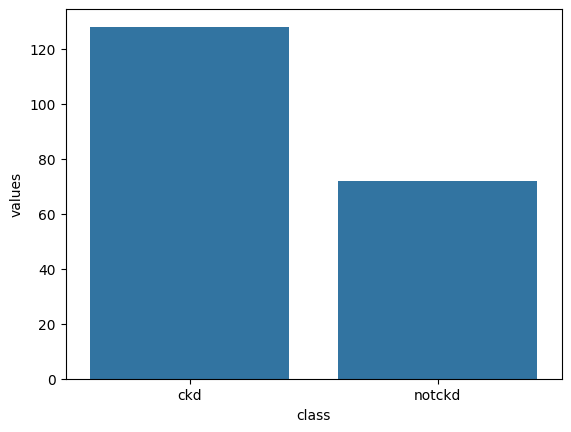

In [ ]:
temp=df_comp['class'].value_counts()
temp_df=pd.DataFrame({'class':temp.index,'values':temp.values})
print(sns.barplot(x='class',y='values',data=temp_df))

converting data type from object to real
-----------------------------------------

In [ ]:
df.select_dtypes(exclude=['object']).columns

Index(['ID', 'bp (Diastolic)', 'bp limit', 'rbc', 'pc', 'pcc', 'ba', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'affected'],
      dtype='object')

In [ ]:
for i in df.select_dtypes(exclude=['object']).columns:
    df_comp[i]=df_comp[i].apply(lambda x:float(x))

In [ ]:
df_comp.dtypes

ID                float64
class              object
age                object
bp (Diastolic)    float64
bp limit          float64
sg                 object
al                  int64
su                 object
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr                object
bu                 object
sc                 object
sod                object
pot                object
hemo               object
pcv                object
rbcc               object
wbcc               object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
grf                object
stage              object
affected          float64
dtype: object

plotting graphs
-------------------

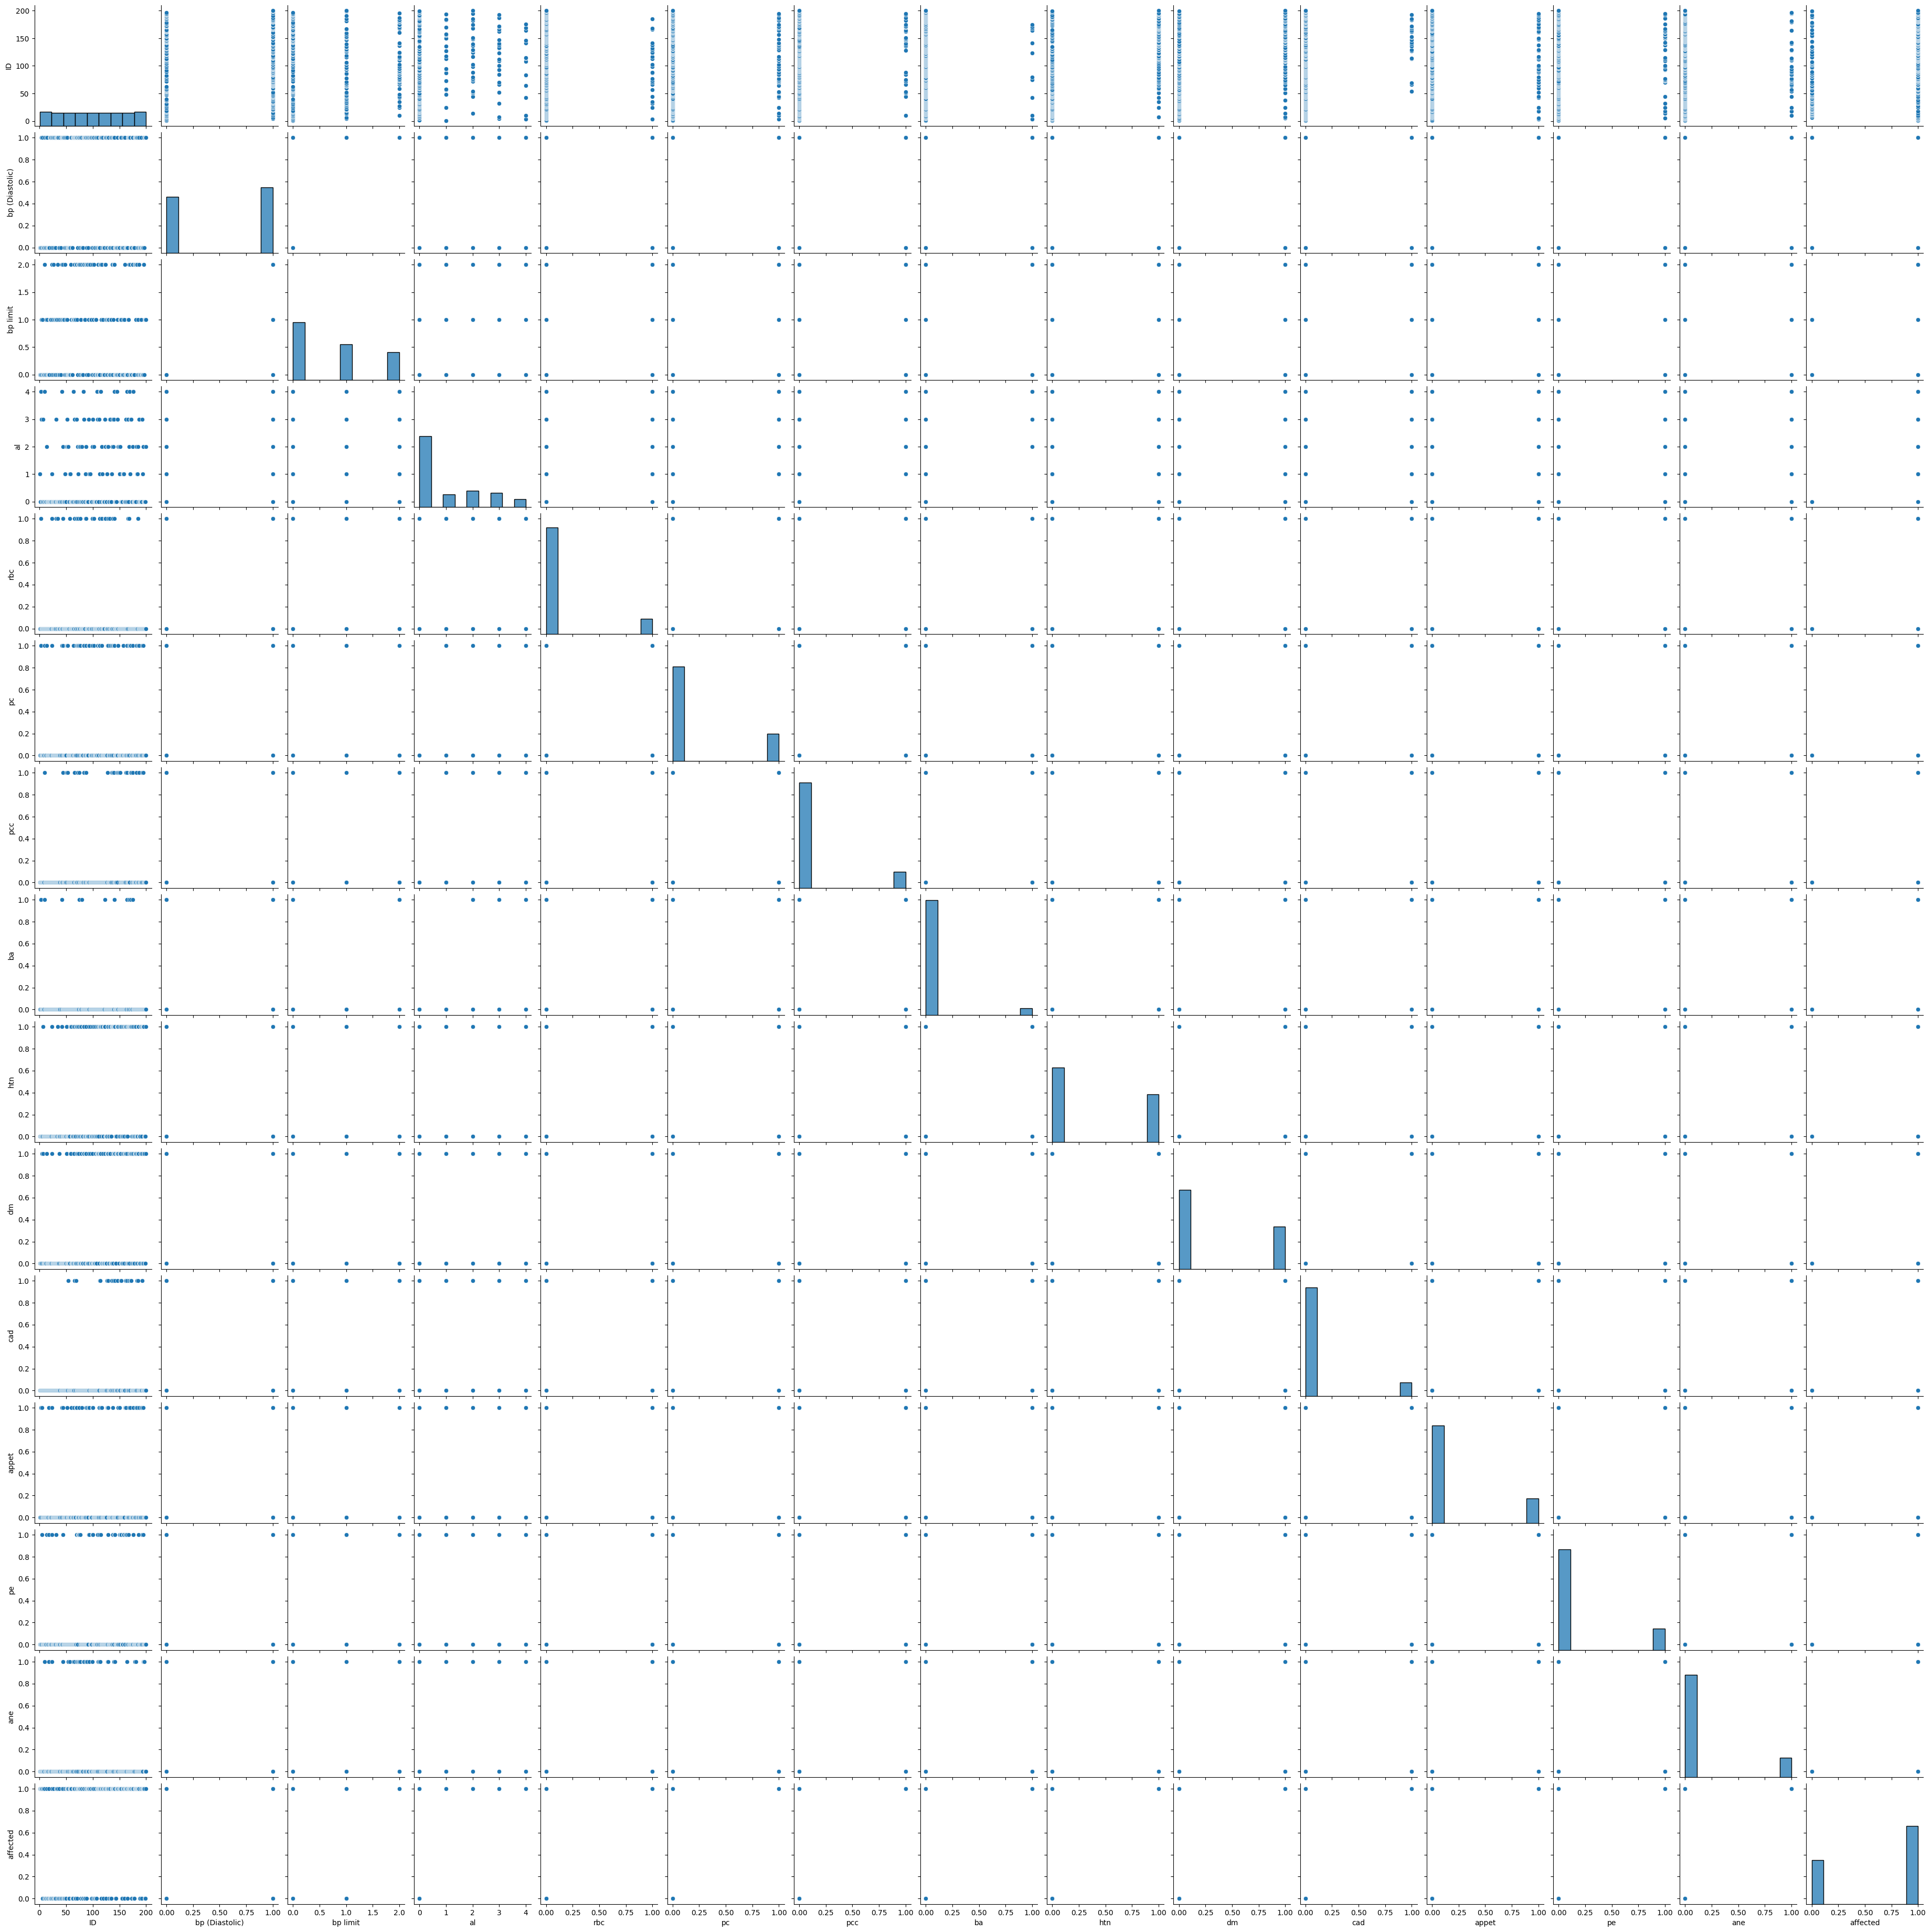

In [ ]:
sns.pairplot(df_comp)

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


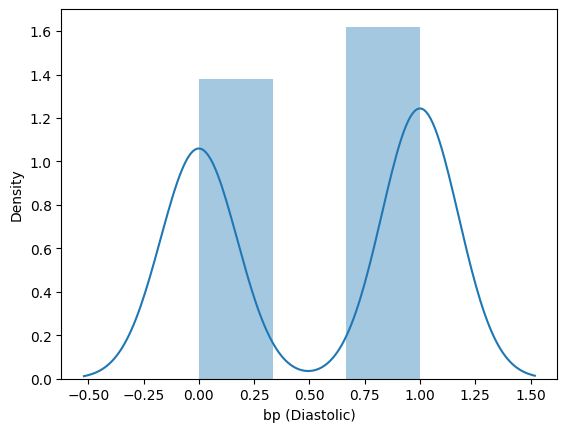

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


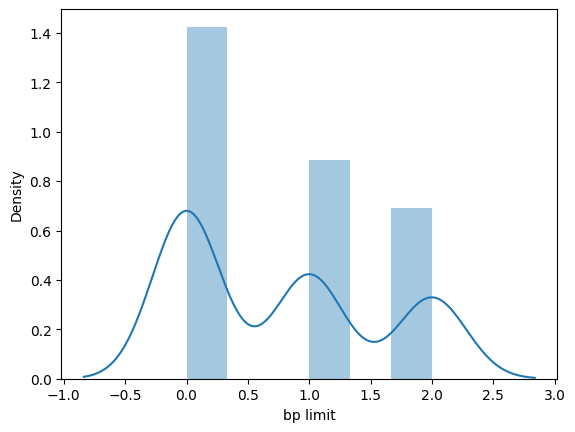

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


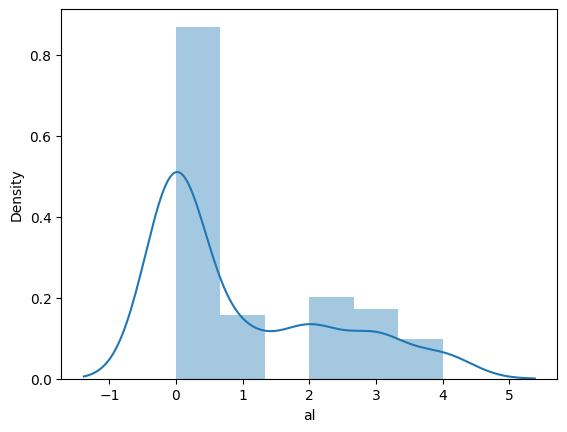

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


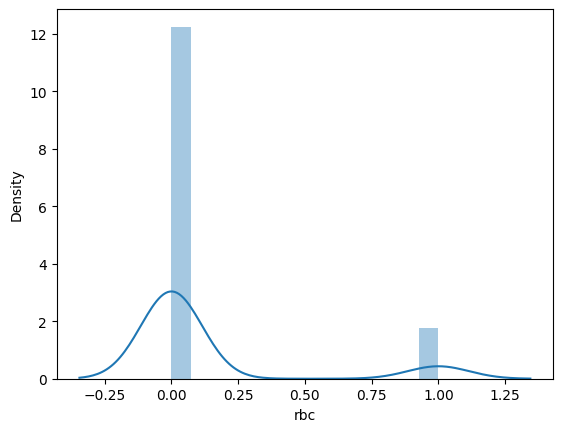

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


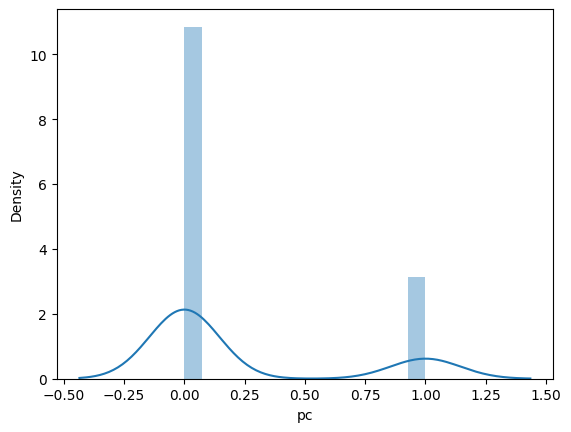

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


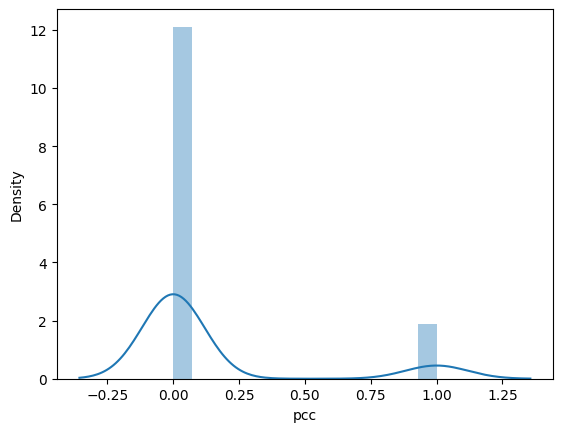

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


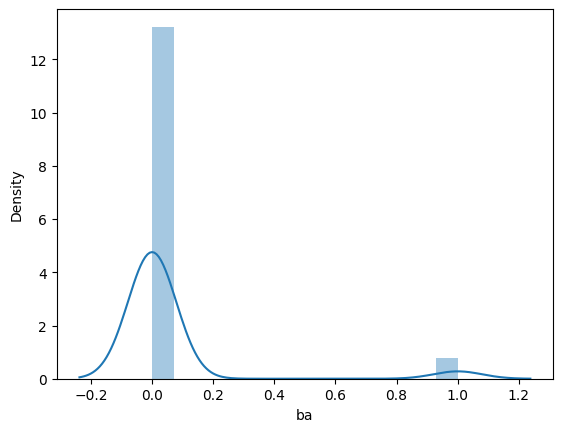

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


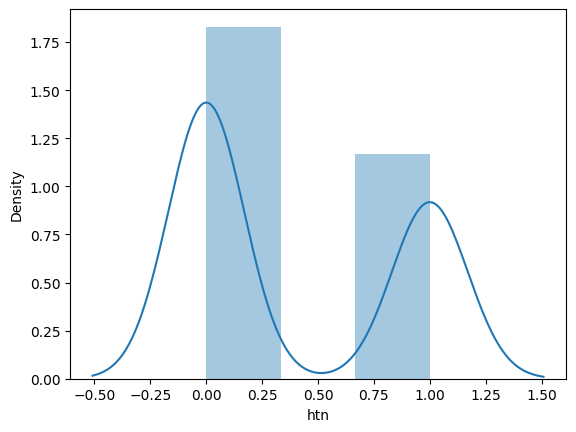

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


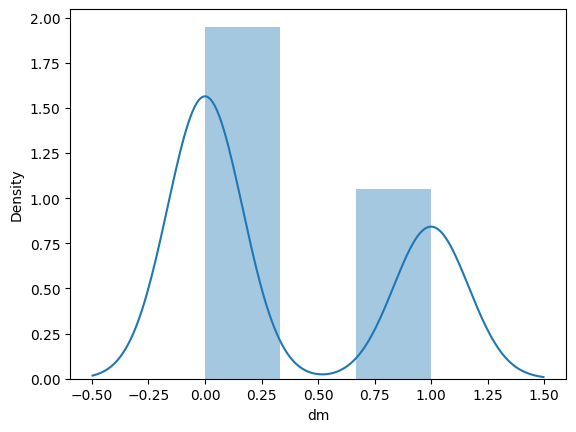

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


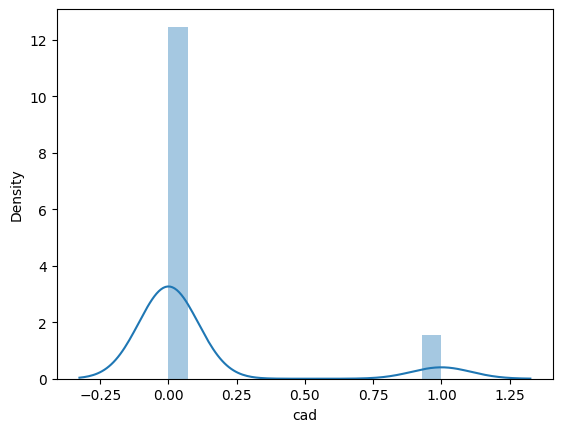

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


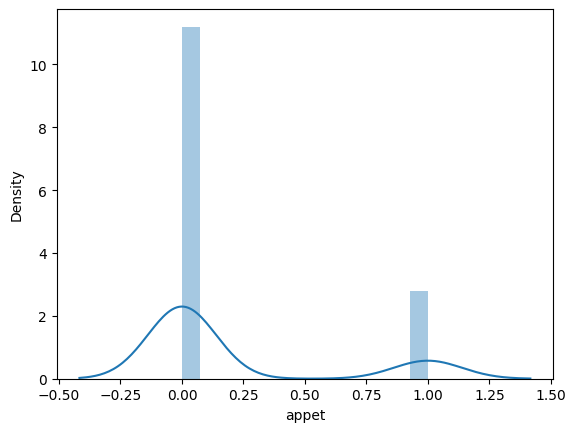

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


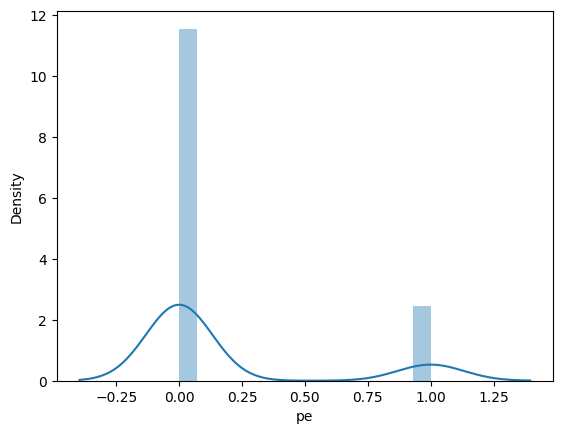

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


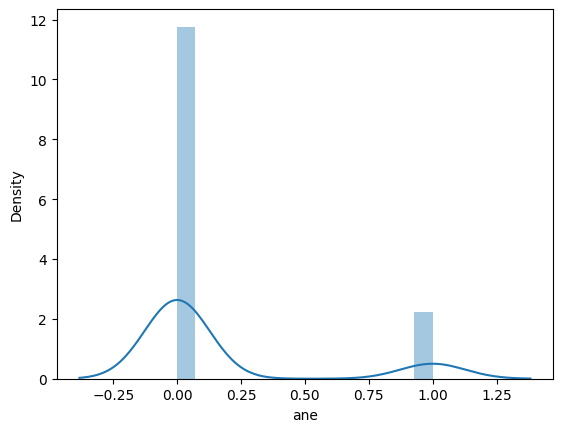

<ipython-input-71-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


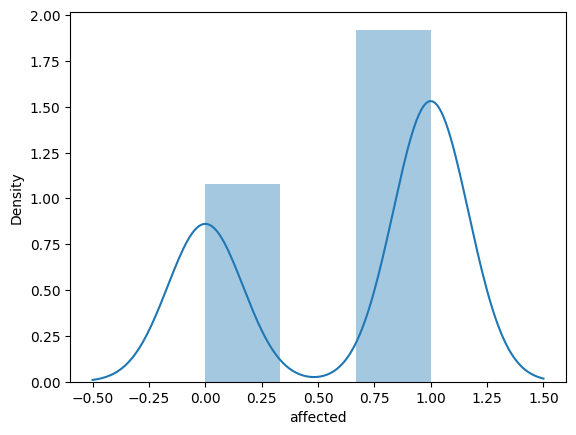

In [ ]:
def distplots(col):
  sns.distplot(df_comp[col])
  plt.show()

for i in list(df_comp.select_dtypes(exclude = ['object']).columns)[1:]:
  distplots(i)

Convert object-type columns to numeric where possible.
------------------------------------------------------------
Steps to Handle Ranges in Object-Type Columns

Define a Function to Calculate the Average of Ranges This function splits each range, converts the bounds to floats, and calculates their average.

Apply the Function to Relevant Columns Use the function to transform each column that contains ranges.

In [ ]:
import pandas as pd

# Sample function to calculate the midpoint of a range
def average_range(value):
    if isinstance(value, str) and '-' in value:
        # Split the range and convert to floats
        lower, upper = map(float, value.split('-'))
        # Return the average of the lower and upper bounds
        return (lower + upper) / 2
    else:
        # If the value is not a range, return NaN (or handle as desired)
        return pd.to_numeric(value, errors='coerce')

# List of columns with range values
columns_with_ranges = ["age", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "rbcc", "wbcc", "grf"]

# Apply the average_range function to each column with ranges
for column in columns_with_ranges:
    df_comp[column] = df_comp[column].apply(average_range)

# Verify the conversion
print(df_comp.info())
print(df_comp.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              200 non-null    float64
 1   class           200 non-null    object 
 2   age             200 non-null    float64
 3   bp (Diastolic)  200 non-null    float64
 4   bp limit        200 non-null    float64
 5   sg              200 non-null    float64
 6   al              200 non-null    int64  
 7   su              200 non-null    int64  
 8   rbc             200 non-null    float64
 9   pc              200 non-null    float64
 10  pcc             200 non-null    float64
 11  ba              200 non-null    float64
 12  bgr             200 non-null    float64
 13  bu              200 non-null    float64
 14  sc              200 non-null    float64
 15  sod             200 non-null    float64
 16  pot             200 non-null    float64
 17  hemo            200 non-null    flo

Still there are object data types and saving the new data
--------------------------------------

In [ ]:
encode = df_comp.apply(preprocessing.LabelEncoder().fit_transform)
encode

ID  class  age  bp (Diastolic)  bp limit  sg  al  su  rbc  pc  ...  \
0      0      0    0               0         0   3   1   0    0   0  ...   
1      1      0    0               0         0   1   0   0    0   0  ...   
2      2      0    0               0         0   1   4   0    1   1  ...   
3      3      0    0               1         1   1   3   0    0   0  ...   
4      4      0    1               0         0   2   0   0    0   0  ...   
..   ...    ...  ...             ...       ...  ..  ..  ..  ...  ..  ...   
195  195      0    9               1         2   3   0   0    0   0  ...   
196  196      0    9               0         0   3   0   0    0   0  ...   
197  197      1    9               1         1   4   0   0    0   0  ...   
198  198      1    9               1         1   4   0   0    0   0  ...   
199  199      0    9               1         1   1   2   2    0   0  ...   

     wbcc  htn  dm  cad  appet  pe  ane  grf  stage  affected  
0       2    0   0    0      0   0    0    9      0         1  
1       4    0   0    0      0   0    0    9      0         1  
2       5    0   0    0      1   0    0    5      0         1  
3       2    0   0    0      0   0    0    5      0         1  
4       2    0   1    0      1   1    0    5      0         1  
..    ...  ...  ..  ...    ...  ..  ...  ...    ...       ...  
195     2    1   1    0      0   0    1    1      2         1  
196     2    0   1    0      0   0    1    0      3         1  
197     2    0   0    0      0   0    0    2      1         0  
198     1    0   0    0      0   0    0    4      0         0  
199     3    1   1    0      0   0    0    0      3         1  

[200 rows x 30 columns]

In [ ]:
encode.to_csv("Final_pre_processed_data.csv")

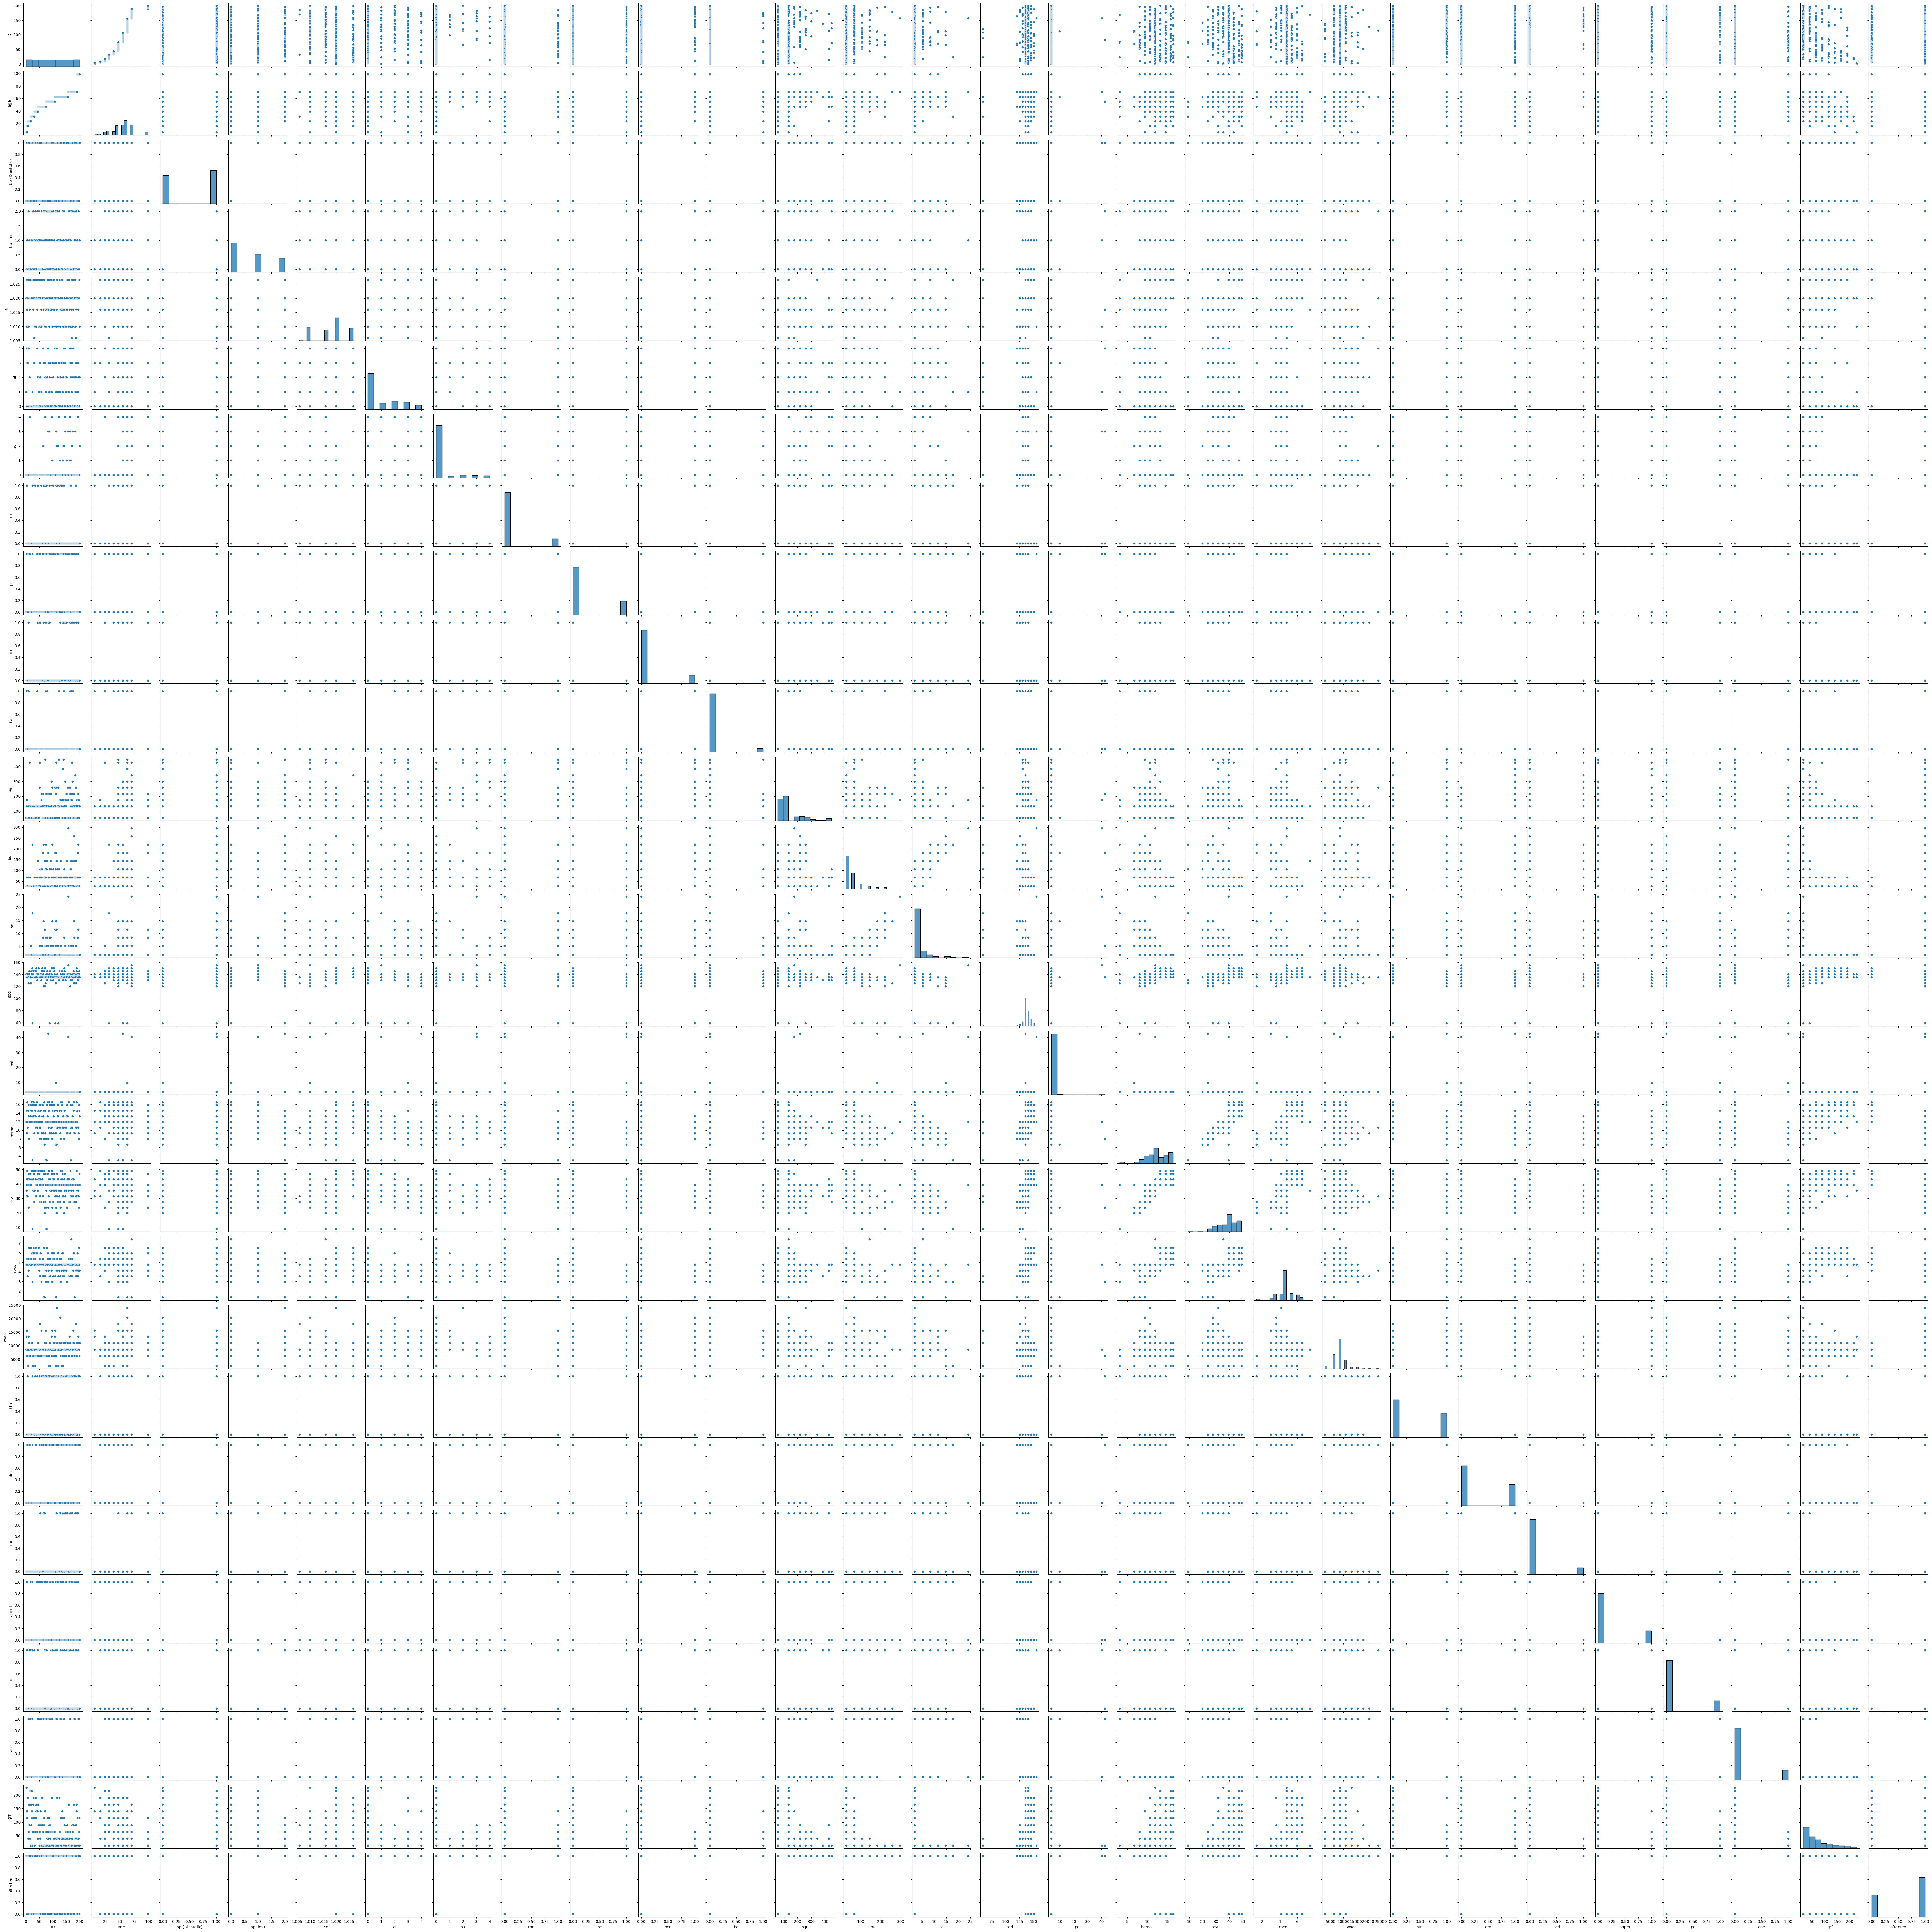

In [ ]:
sns.pairplot(df_comp)

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


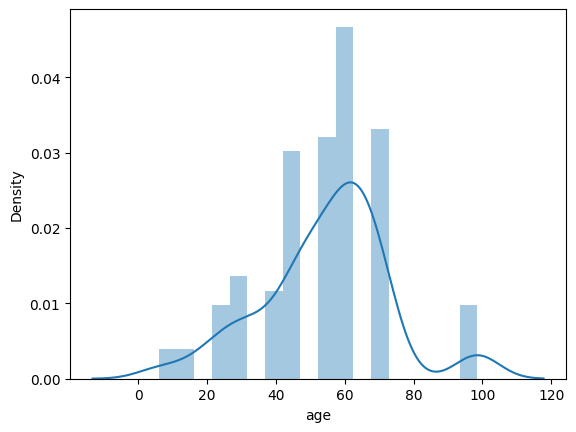

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


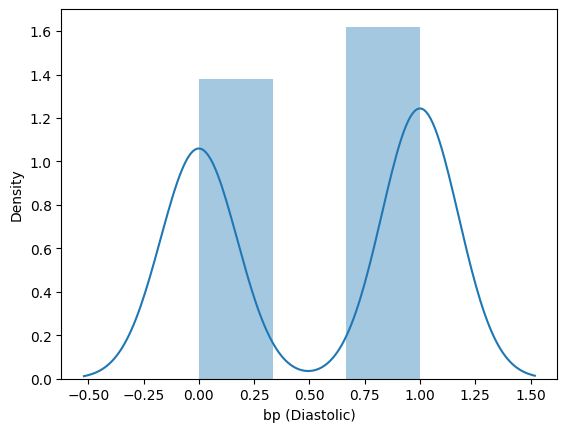

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


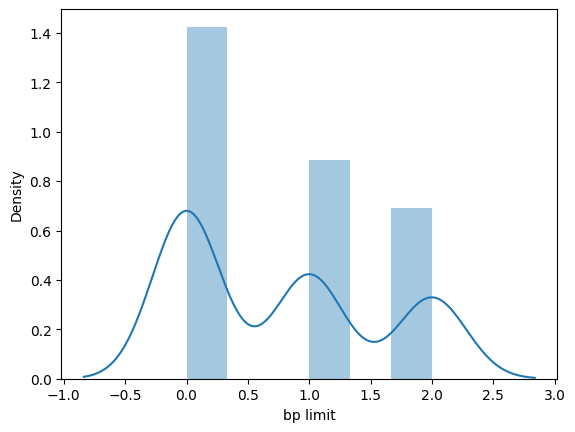

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


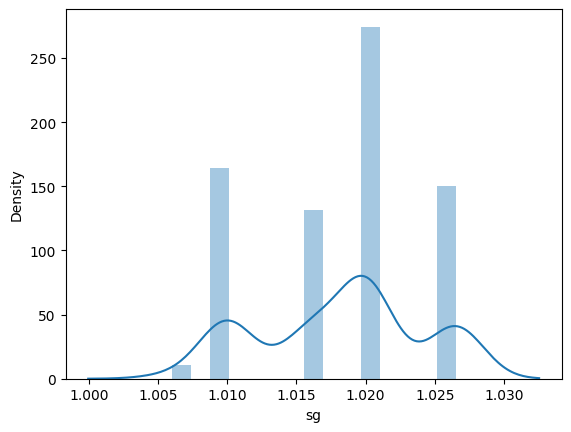

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


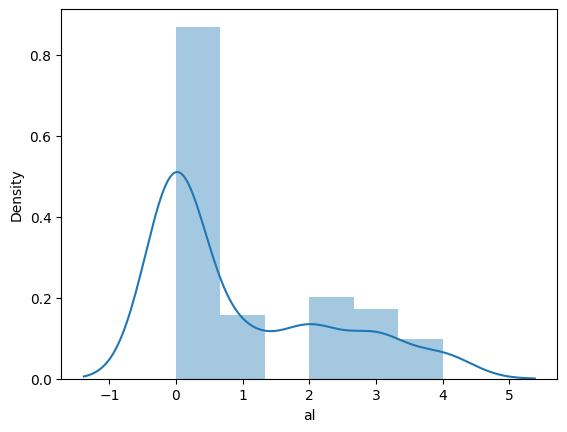

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


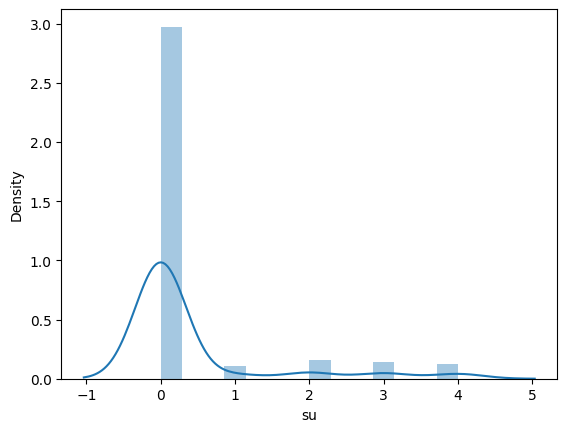

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


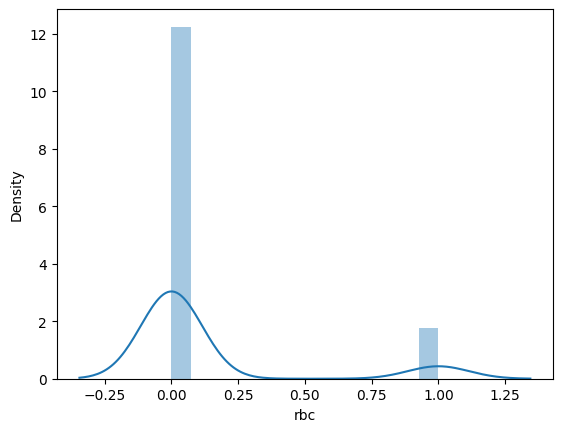

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


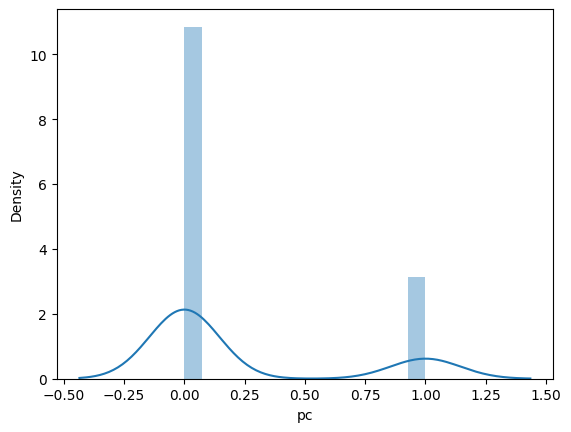

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


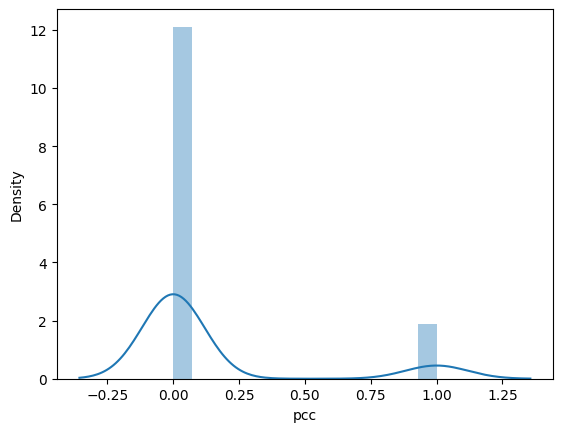

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


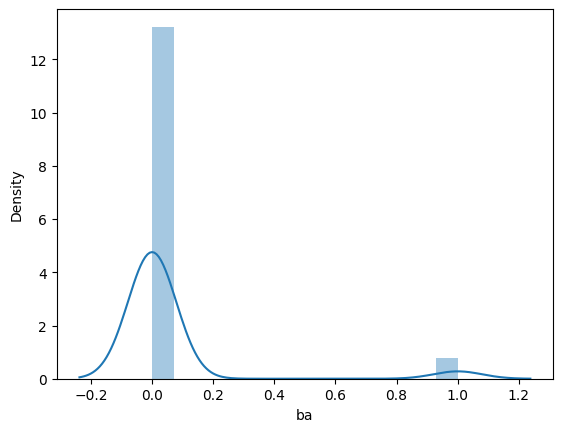

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


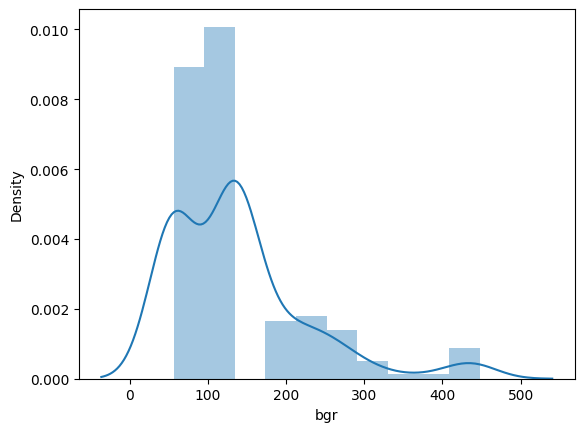

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


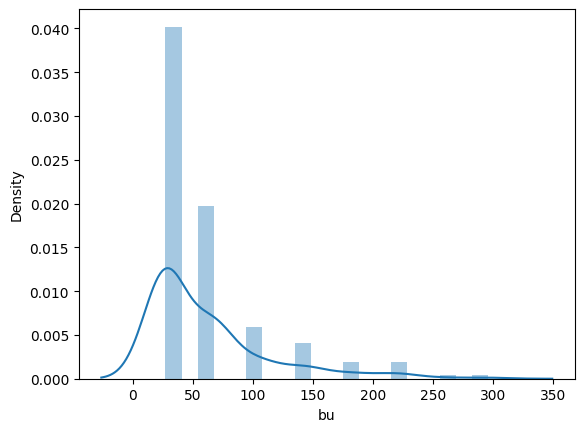

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


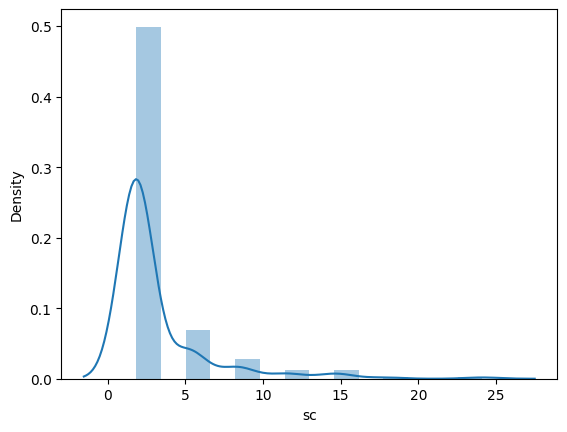

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


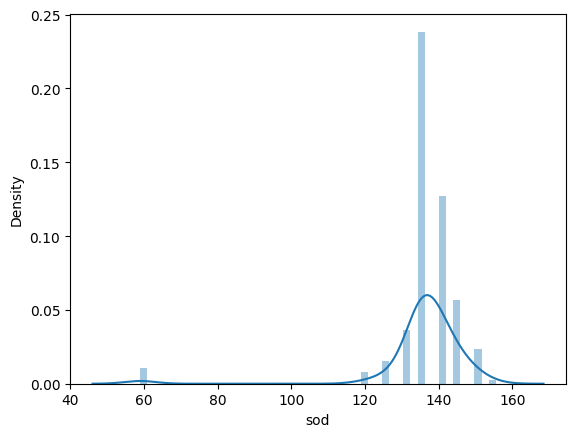

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


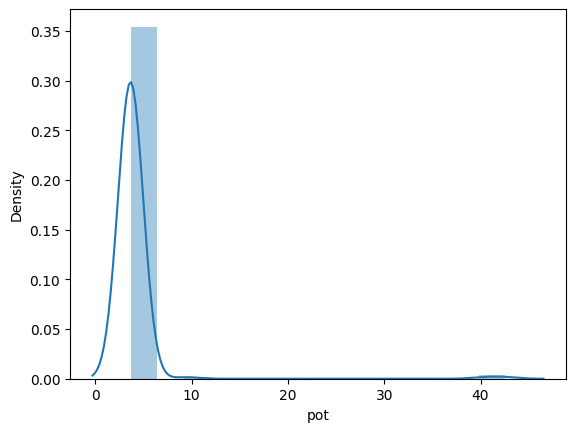

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


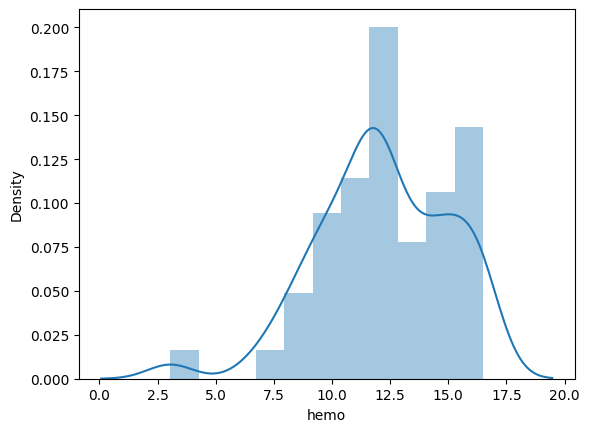

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


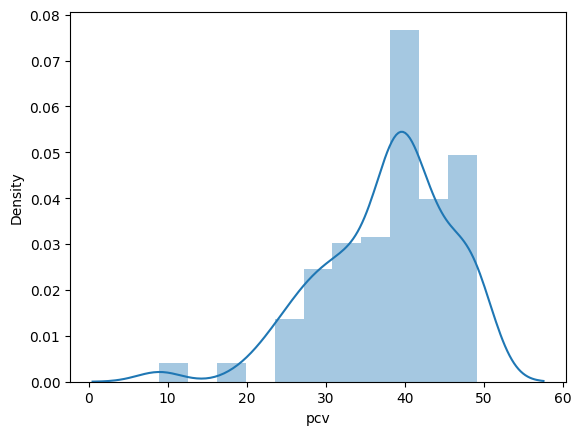

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


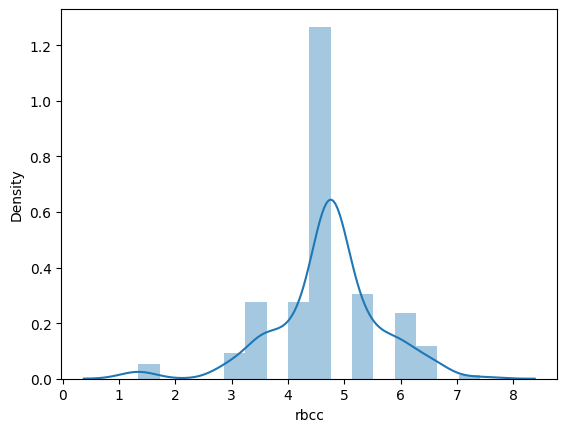

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


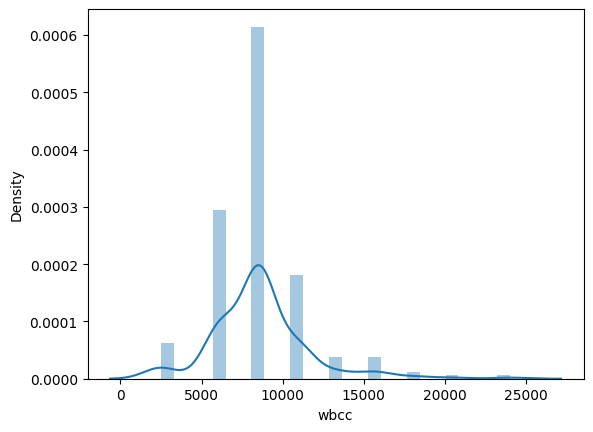

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


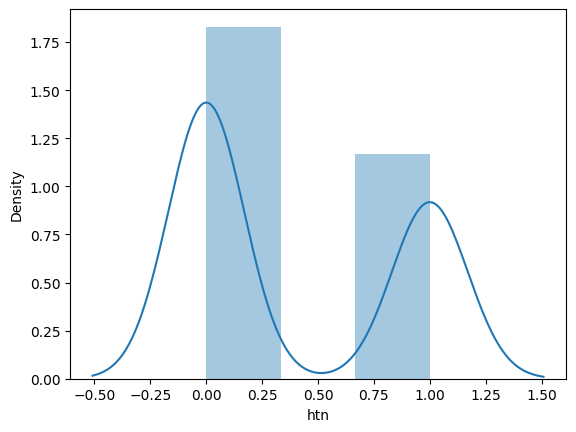

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


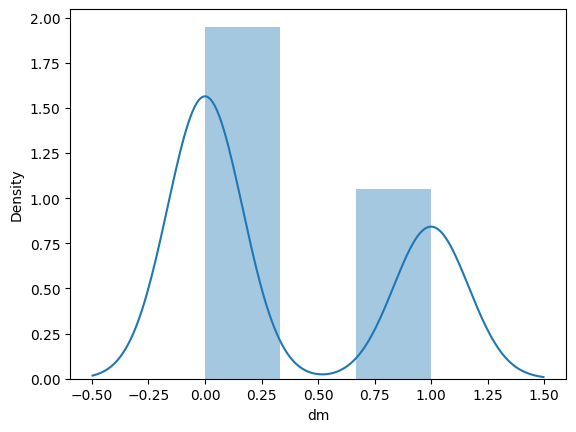

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


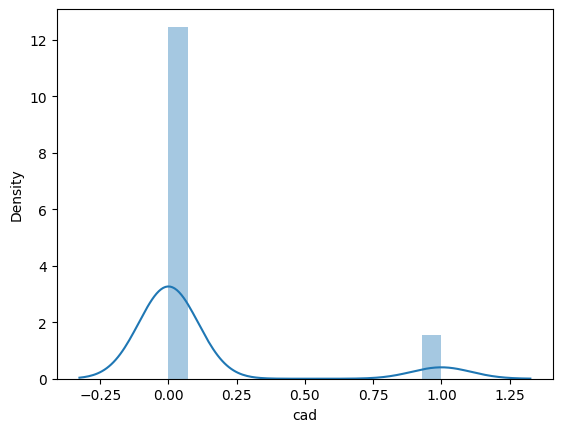

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


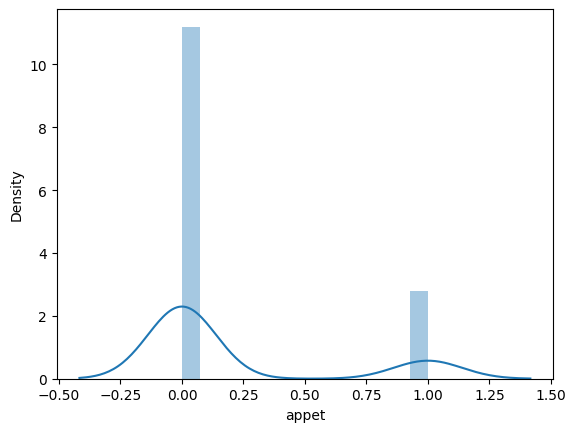

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


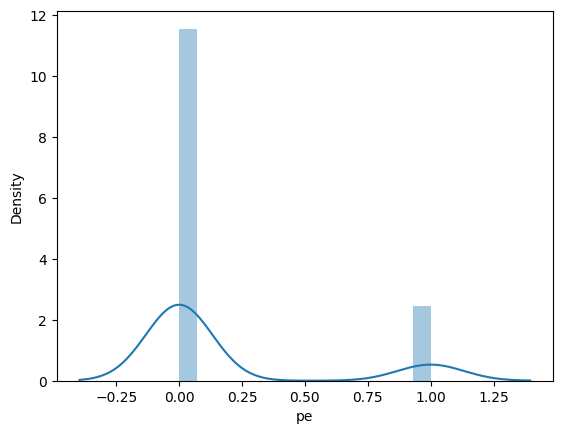

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


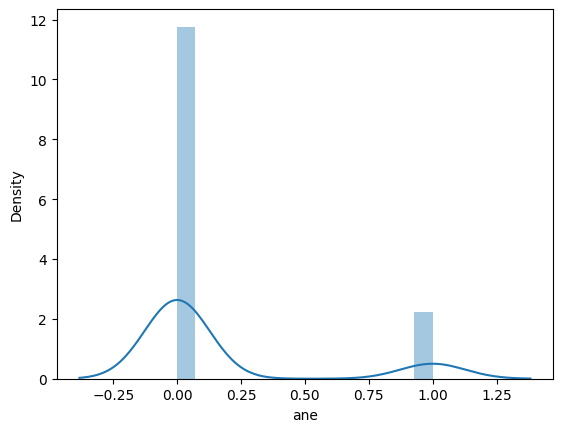

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


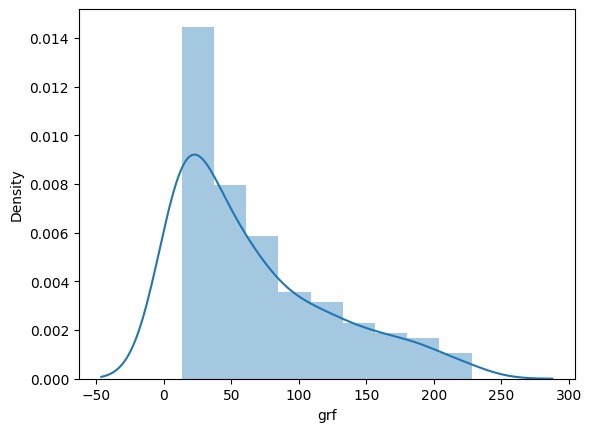

<ipython-input-76-14ca2009cecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comp[col])


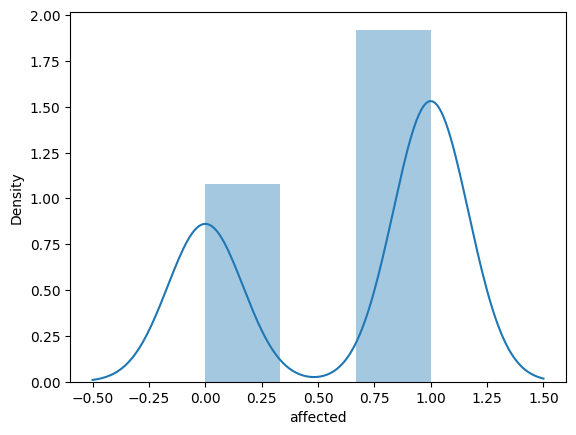

In [ ]:
def distplots(col):
  sns.distplot(df_comp[col])
  plt.show()

for i in list(df_comp.select_dtypes(exclude = ['object']).columns)[1:]:
  distplots(i)

Outliers
-----------------

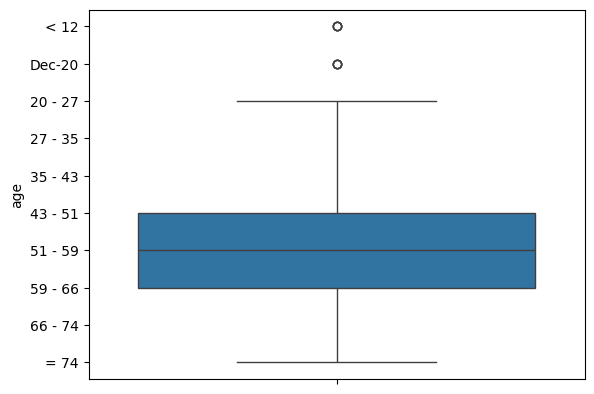

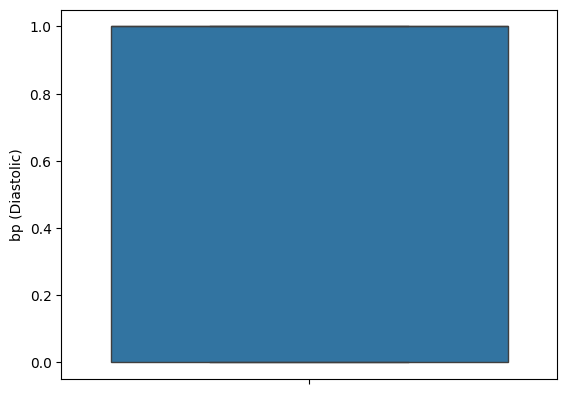

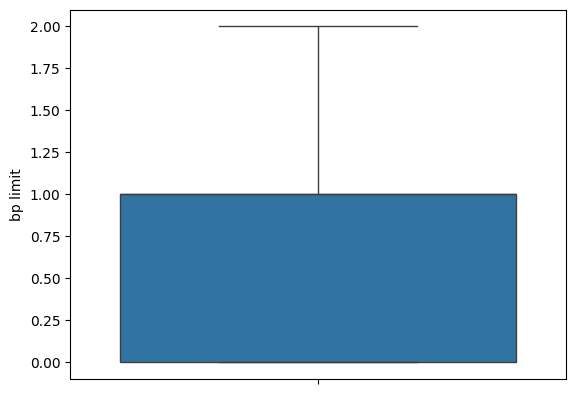

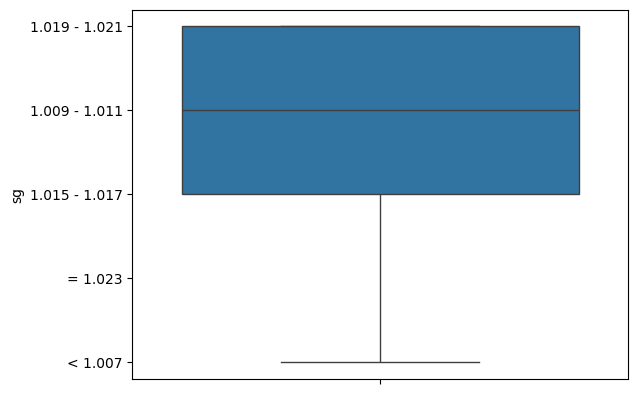

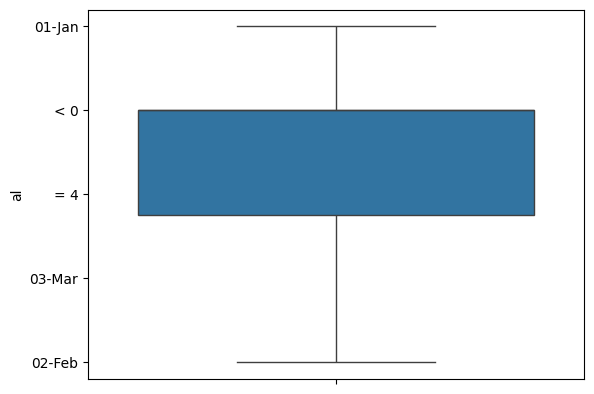

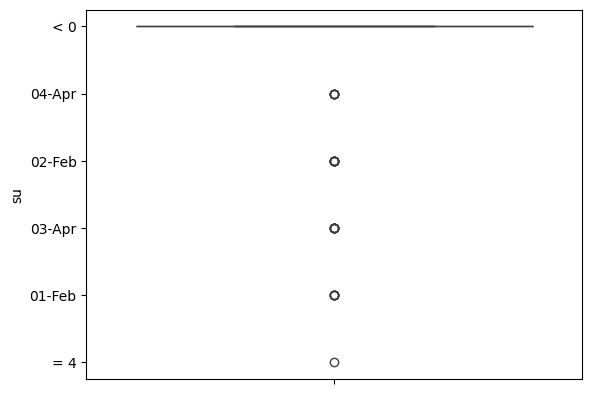

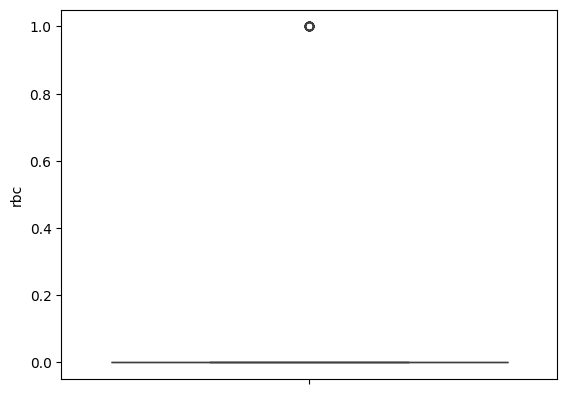

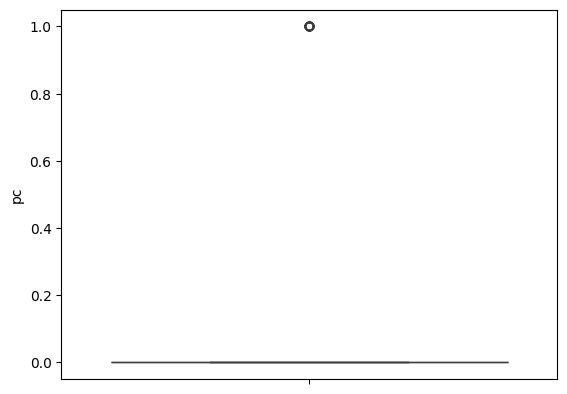

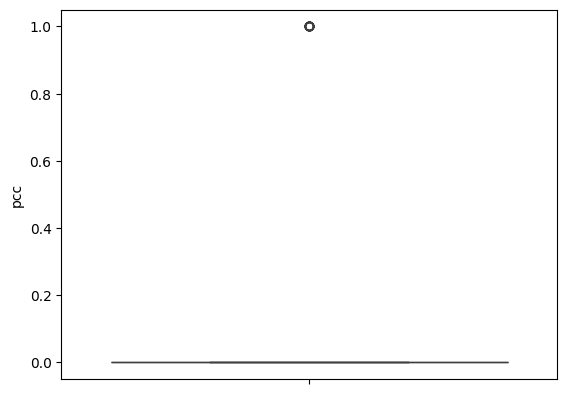

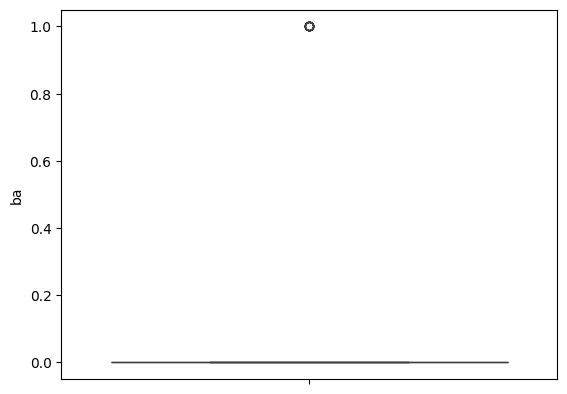

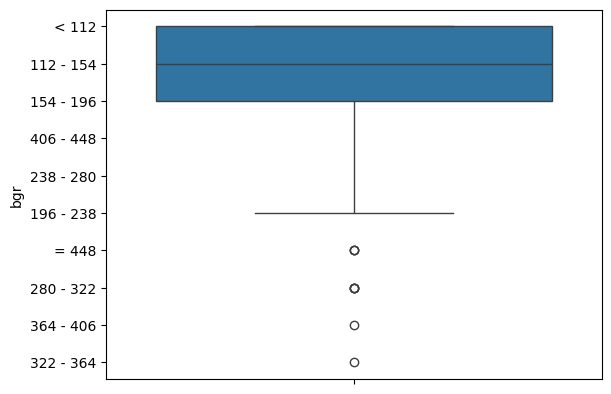

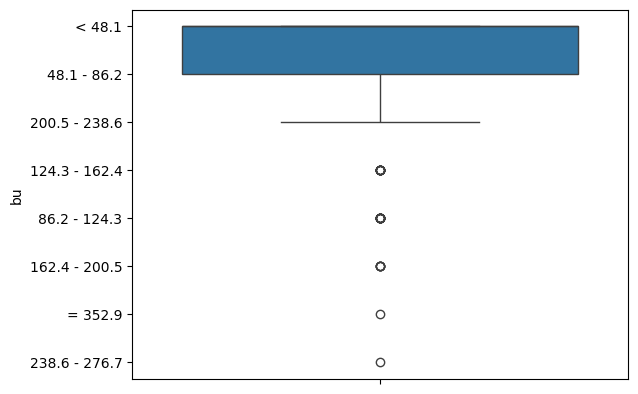

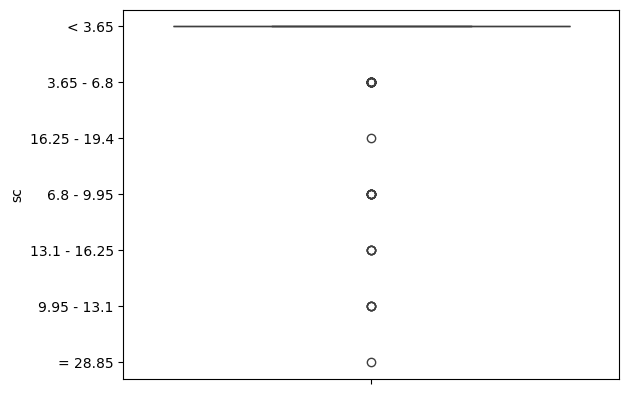

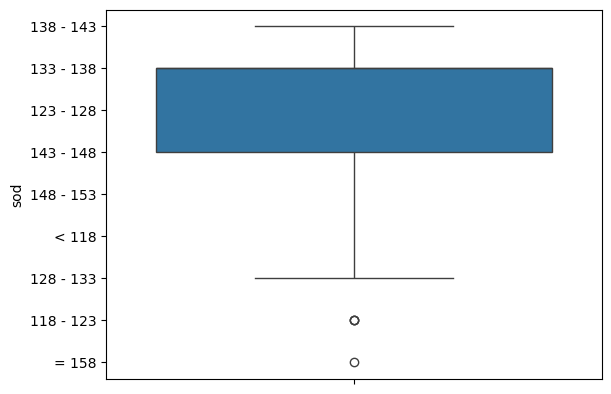

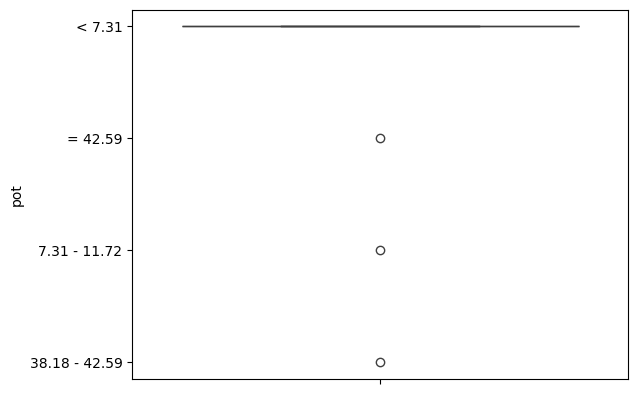

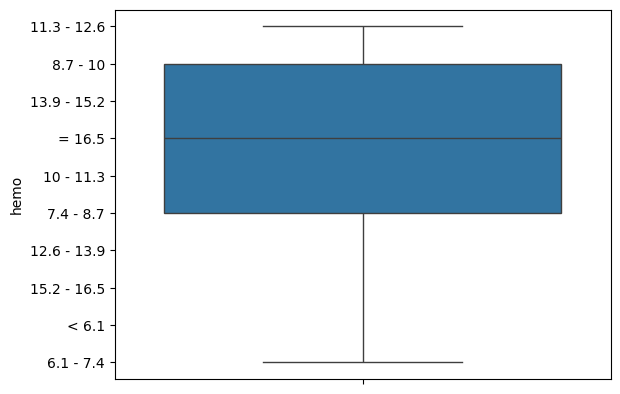

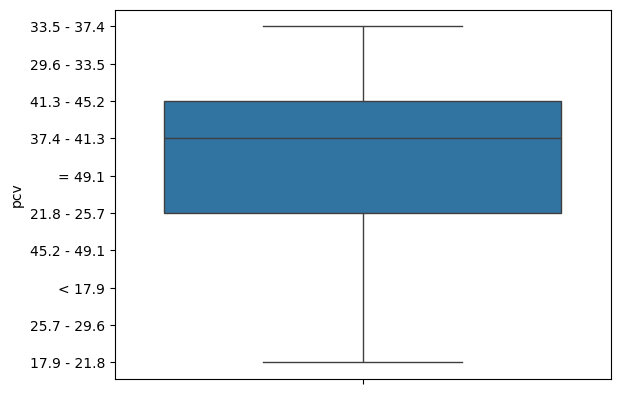

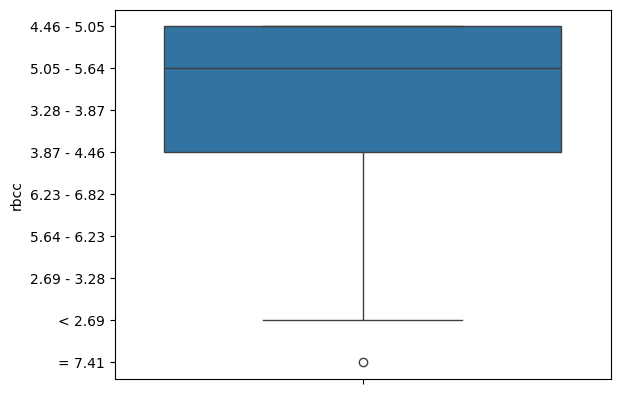

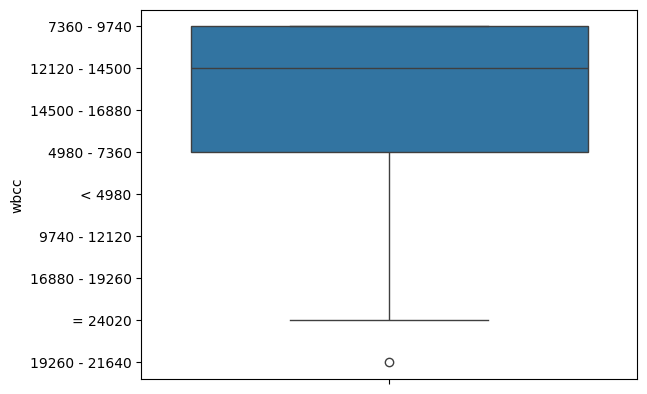

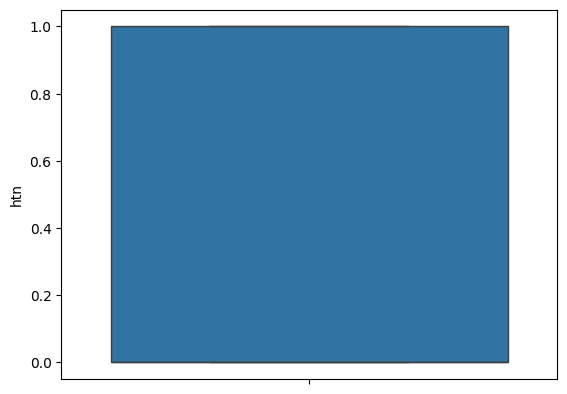

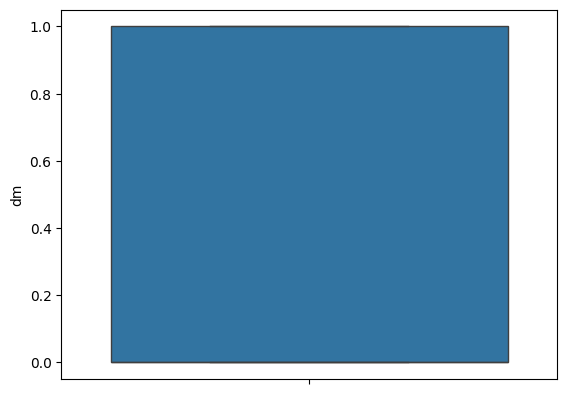

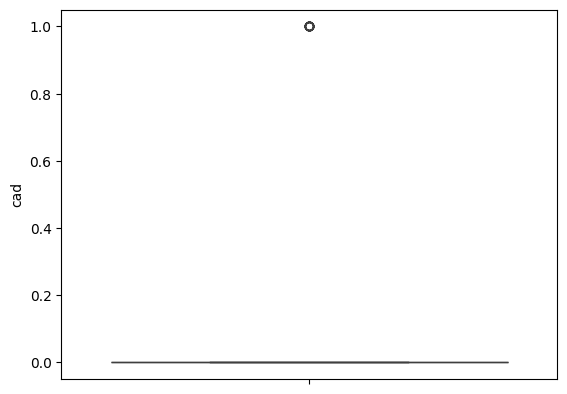

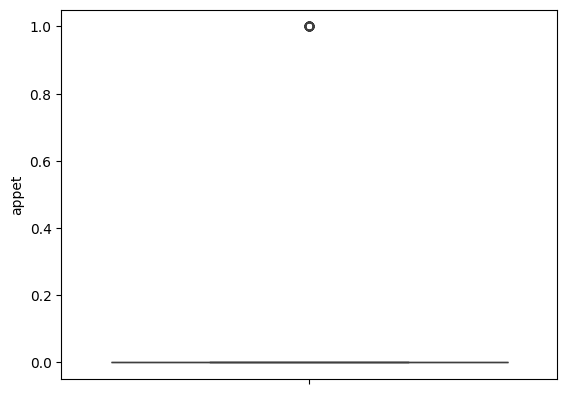

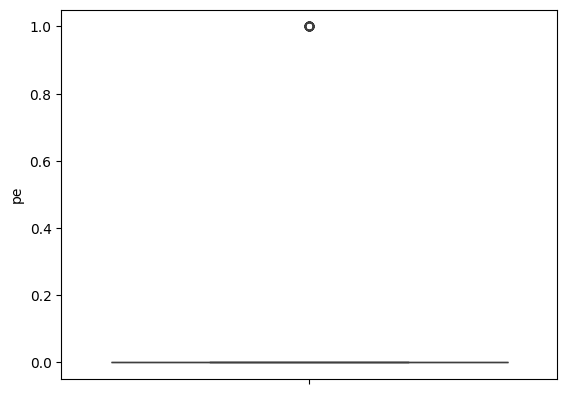

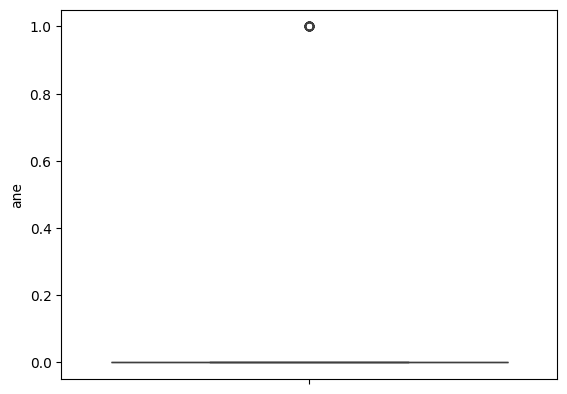

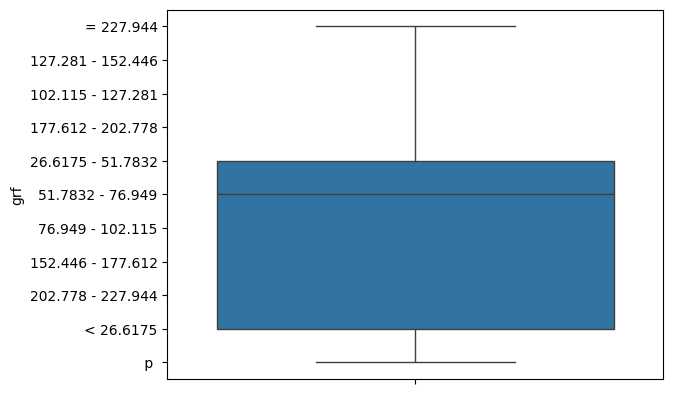

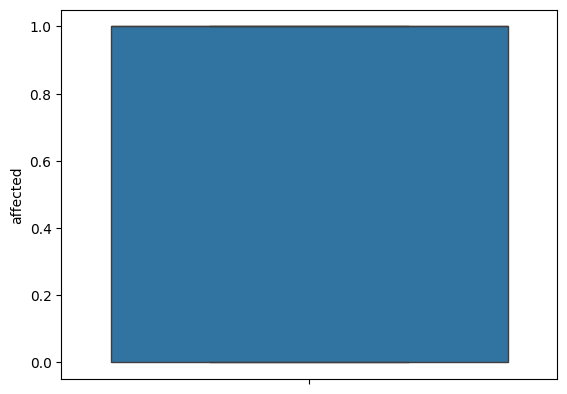

In [ ]:
def boxf(col):
  sns.boxplot(df[col])
  plt.show()
for i in list(df_comp.select_dtypes(exclude = ['object']).columns)[1:]:
  boxf(i)

Checking the corelation of both data set
-------------------------------------------

<Axes: >

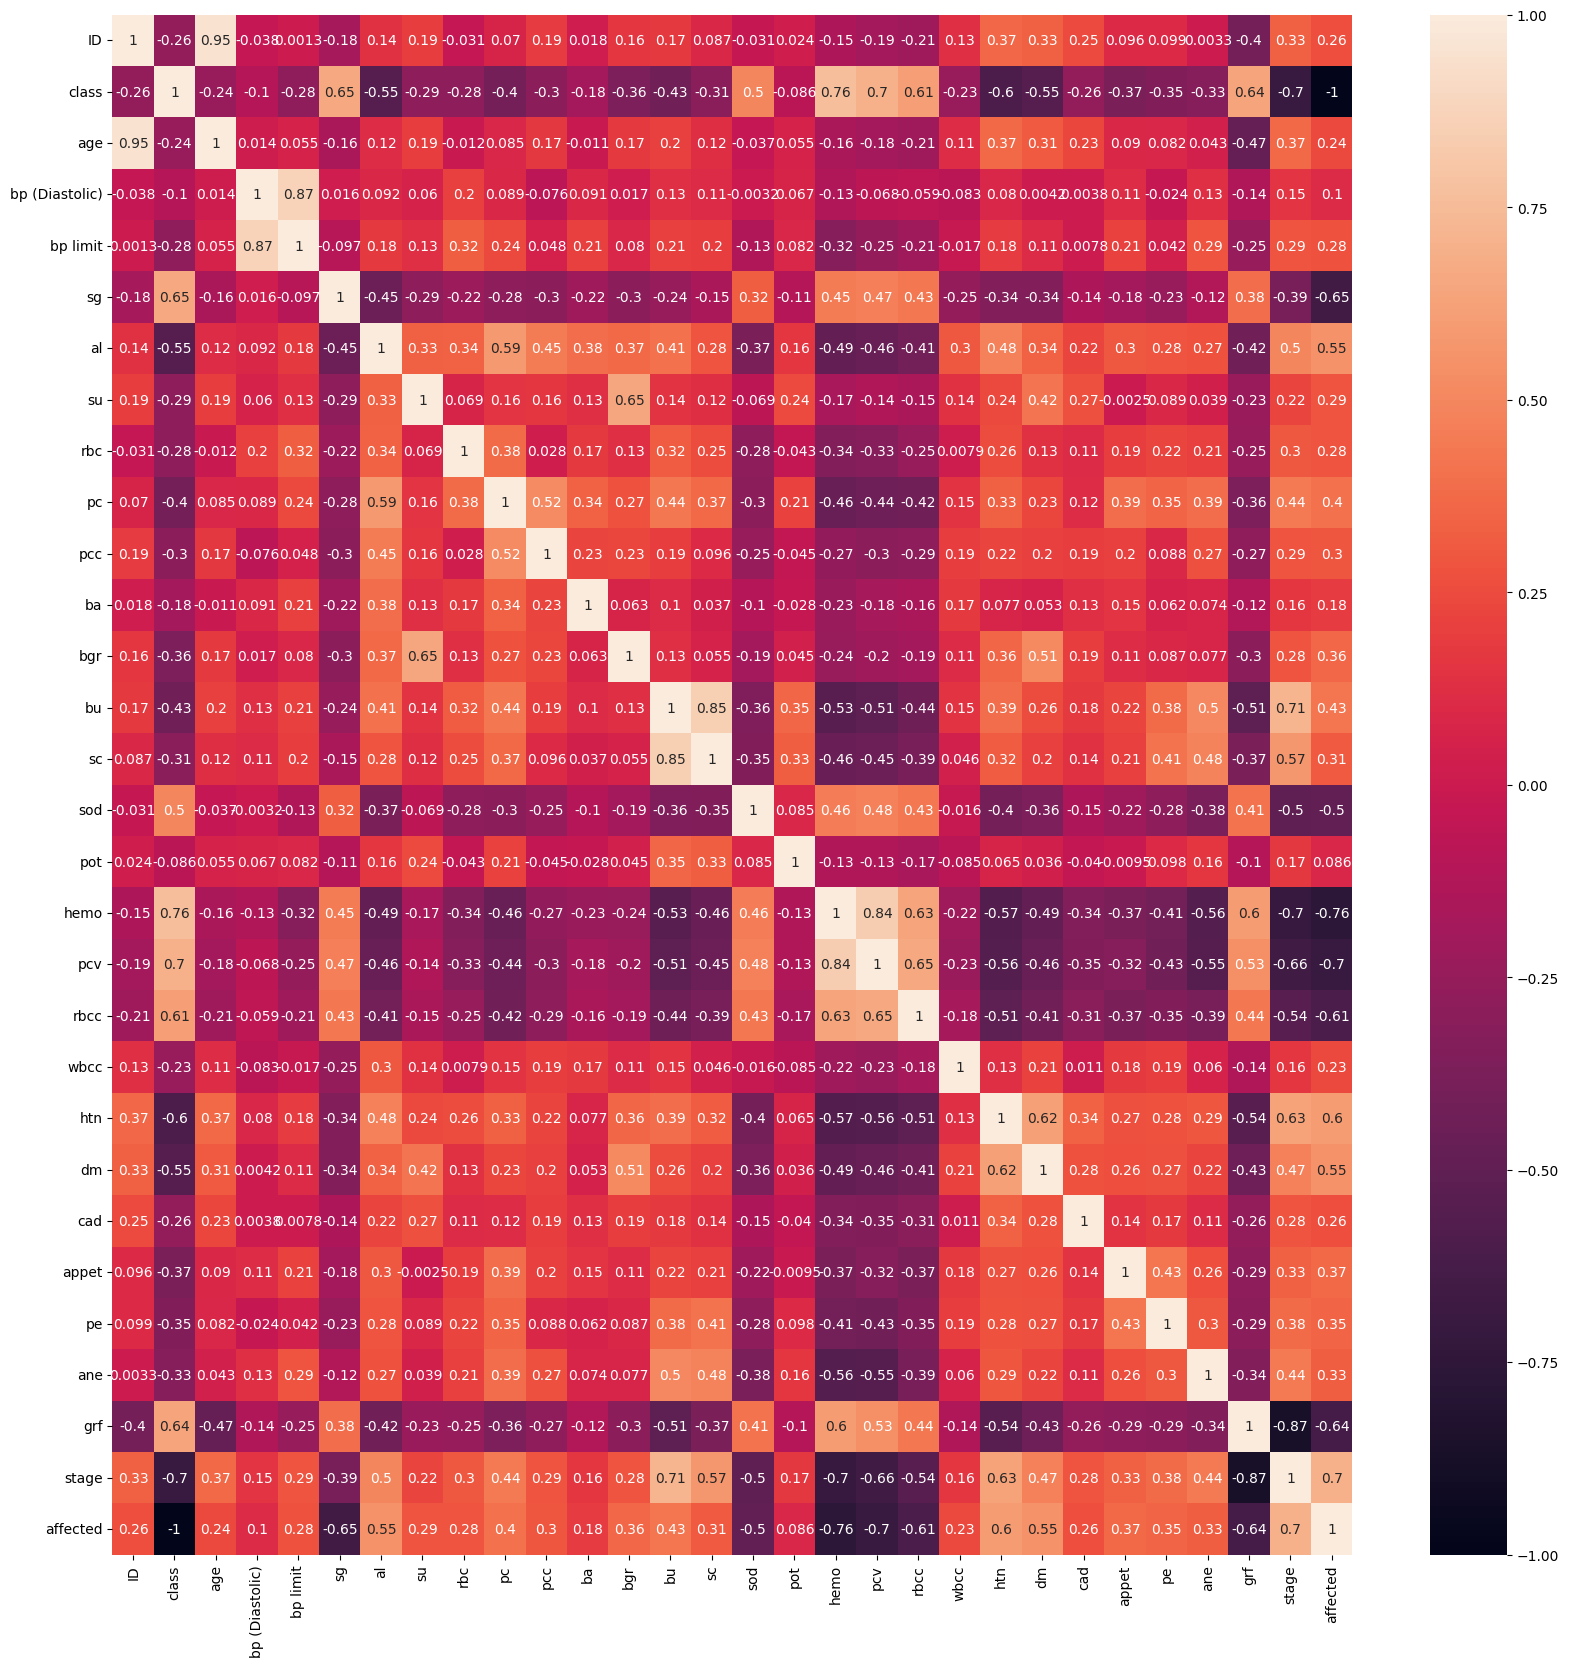

In [ ]:
plt.figure(figsize=(20,20))
corr = encode.corr()#corr funtion
sns.heatmap(corr, annot=True)

Deviding data into dependent data and independent data
------------------------------------------------------------

In [ ]:
df.columns

Index(['ID', 'class', 'age', 'bp (Diastolic)', 'bp limit', 'sg', 'al', 'su',
       'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf',
       'stage', 'affected'],
      dtype='object')

In [ ]:
x= encode.drop(['ID','class'],axis=1)
#axis =1 means checking data by column
#axis =0 means checking data by row
y=encode['class']

In [ ]:
x

age  bp (Diastolic)  bp limit  sg  al  su  rbc  pc  pcc  ba  ...  wbcc  \
0      0               0         0   3   1   0    0   0    0   0  ...     2   
1      0               0         0   1   0   0    0   0    0   0  ...     4   
2      0               0         0   1   4   0    1   1    0   1  ...     5   
3      0               1         1   1   3   0    0   0    0   0  ...     2   
4      1               0         0   2   0   0    0   0    0   0  ...     2   
..   ...             ...       ...  ..  ..  ..  ...  ..  ...  ..  ...   ...   
195    9               1         2   3   0   0    0   0    0   0  ...     2   
196    9               0         0   3   0   0    0   0    0   0  ...     2   
197    9               1         1   4   0   0    0   0    0   0  ...     2   
198    9               1         1   4   0   0    0   0    0   0  ...     1   
199    9               1         1   1   2   2    0   0    0   0  ...     3   

     htn  dm  cad  appet  pe  ane  grf  stage  affected  
0      0   0    0      0   0    0    9      0         1  
1      0   0    0      0   0    0    9      0         1  
2      0   0    0      1   0    0    5      0         1  
3      0   0    0      0   0    0    5      0         1  
4      0   1    0      1   1    0    5      0         1  
..   ...  ..  ...    ...  ..  ...  ...    ...       ...  
195    1   1    0      0   0    1    1      2         1  
196    0   1    0      0   0    1    0      3         1  
197    0   0    0      0   0    0    2      1         0  
198    0   0    0      0   0    0    4      0         0  
199    1   1    0      0   0    0    0      3         1  

[200 rows x 28 columns]

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    0
Name: class, Length: 200, dtype: int64

**As we can see that the target data 'class' column is not equaly devided**

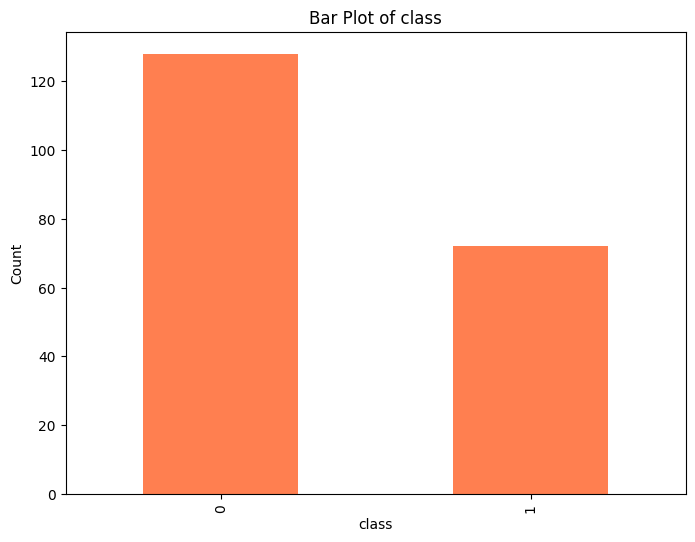

In [ ]:
categorical_column = "class"

plt.figure(figsize=(8, 6))
encode[categorical_column].value_counts().plot(kind='bar', color='coral')
plt.xlabel(categorical_column)
plt.ylabel("Count")
plt.title(f"Bar Plot of {categorical_column}")
plt.show()

In [ ]:
# Display value counts for each class
class_distribution = encode['class'].value_counts()
print(class_distribution)


class
0    128
1     72
Name: count, dtype: int64


Why we need to balance the data
-----------------------------------

Balancing a dataset is often important, especially when working with classification tasks, to ensure the model performs well on all classes. Here are some key reasons why balancing data can be crucial:

1. Preventing Bias Towards Majority Class
In imbalanced datasets, models tend to favor the majority class, leading to a high accuracy that may be misleading. For example, if 90% of instances belong to one class, a model can achieve 90% accuracy by always predicting that class, but it will fail to recognize the minority class.

2. Improving Model Generalization
When a dataset is balanced, the model gets equal exposure to each class, which helps it learn patterns that distinguish between them. This enhances the model’s ability to generalize well to new, unseen data, rather than overfitting to the dominant class.

3. Enhancing Performance Metrics
In imbalanced datasets, metrics like accuracy can be deceptive. For example, a high accuracy rate may not indicate strong performance on the minority class. Balanced datasets help improve metrics such as precision, recall, and F1-score for all classes, leading to a better understanding of model performance.

4. Avoiding Missed Opportunities with Minority Classes
In many real-world applications, the minority class is often the one of interest (e.g., fraud detection, disease prediction, or defect identification). Without balancing, the model may ignore these critical cases, resulting in missed opportunities for identifying important patterns in the data.

5. Enabling Fairness in Predictions
Balancing classes can also help reduce bias in predictions, which is especially important in applications like healthcare, finance, or criminal justice, where the consequences of misclassification can be significant.

Common Methods for Balancing Data
Resampling Techniques: Such as oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
Using Synthetic Data: Synthetic data generation for the minority class to balance the distribution.
Using Class Weights: Assigning higher weights to the minority class during training so the model gives it more attention.
Balancing is especially recommended for applications where both precision and recall are essential across classes.



```
# This is formatted as code
```

***Balancing the target data 'class'***
----------------------------------------

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

This code snippet is setting up tools to address class imbalance by resampling, using two popular methods from the imblearn (imbalanced-learn) library: RandomOverSampler and RandomUnderSampler. The Counter class from Python’s collections module is used to display the distribution of classes.

Here’s a breakdown of each part of the code:

1. from imblearn.over_sampling import RandomOverSampler
Purpose: RandomOverSampler is a technique that creates additional samples for the minority class by duplicating existing samples. This helps balance the dataset by increasing the number of instances in the minority class.
Usage: After initializing RandomOverSampler, you can apply it to your dataset, and it will randomly duplicate samples from the minority class until all classes are represented equally.

2. from imblearn.under_sampling import RandomUnderSampler
Purpose: RandomUnderSampler is the opposite of oversampling. It randomly removes samples from the majority class to reduce the imbalance by decreasing the number of instances in the majority class.
Usage: After initializing RandomUnderSampler, you can apply it to your dataset, and it will randomly select a subset of samples from the majority class, balancing the dataset by reducing majority class samples.

3. from collections import Counter
Purpose: Counter is a Python class that counts occurrences of each value in an array or list. It’s commonly used to check the distribution of classes before and after resampling.
Usage: You can pass in your class labels (e.g., y) to Counter to get a summary of how many instances belong to each class.

In [ ]:
print(Counter(y))

Counter({0: 128, 1: 72})


In [ ]:
ros= RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 128, 1: 128})


In [ ]:
x

age  bp (Diastolic)  bp limit  sg  al  su  rbc  pc  pcc  ba  ...  wbcc  \
0      0               0         0   3   1   0    0   0    0   0  ...     2   
1      0               0         0   1   0   0    0   0    0   0  ...     4   
2      0               0         0   1   4   0    1   1    0   1  ...     5   
3      0               1         1   1   3   0    0   0    0   0  ...     2   
4      1               0         0   2   0   0    0   0    0   0  ...     2   
..   ...             ...       ...  ..  ..  ..  ...  ..  ...  ..  ...   ...   
195    9               1         2   3   0   0    0   0    0   0  ...     2   
196    9               0         0   3   0   0    0   0    0   0  ...     2   
197    9               1         1   4   0   0    0   0    0   0  ...     2   
198    9               1         1   4   0   0    0   0    0   0  ...     1   
199    9               1         1   1   2   2    0   0    0   0  ...     3   

     htn  dm  cad  appet  pe  ane  grf  stage  affected  
0      0   0    0      0   0    0    9      0         1  
1      0   0    0      0   0    0    9      0         1  
2      0   0    0      1   0    0    5      0         1  
3      0   0    0      0   0    0    5      0         1  
4      0   1    0      1   1    0    5      0         1  
..   ...  ..  ...    ...  ..  ...  ...    ...       ...  
195    1   1    0      0   0    1    1      2         1  
196    0   1    0      0   0    1    0      3         1  
197    0   0    0      0   0    0    2      1         0  
198    0   0    0      0   0    0    4      0         0  
199    1   1    0      0   0    0    0      3         1  

[200 rows x 28 columns]

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    0
Name: class, Length: 200, dtype: int64

In [ ]:
df.shape#to check no of columns

(200, 30)

Splitting the data for train and test
-------------------------------------

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [ ]:
x_train.shape

(160, 28)

In [ ]:
x_train

age  bp (Diastolic)  bp limit  sg  al  su  rbc  pc  pcc  ba  ...  wbcc  \
129    7               1         1   3   0   0    0   0    0   0  ...     2   
128    7               1         1   2   2   0    1   1    0   0  ...     2   
60     5               0         0   3   0   0    0   0    0   0  ...     2   
122    7               1         2   1   3   4    1   0    0   1  ...     3   
27     3               1         1   4   0   0    0   0    0   0  ...     1   
..   ...             ...       ...  ..  ..  ..  ...  ..  ...  ..  ...   ...   
151    7               1         1   3   0   0    0   0    0   0  ...     2   
67     5               1         1   4   0   0    0   0    0   0  ...     1   
25     3               0         0   3   0   0    0   0    0   0  ...     0   
196    9               0         0   3   0   0    0   0    0   0  ...     2   
175    8               0         0   2   4   0    0   0    0   0  ...     5   

     htn  dm  cad  appet  pe  ane  grf  stage  affected  
129    0   0    0      0   0    0    4      0         1  
128    1   1    1      1   1    1    0      3         1  
60     0   0    0      0   0    0    7      0         0  
122    1   1    0      0   0    0    0      3         1  
27     0   0    0      0   0    0    6      0         0  
..   ...  ..  ...    ...  ..  ...  ...    ...       ...  
151    1   1    1      0   1    0    1      2         1  
67     0   0    0      0   0    0    4      0         0  
25     0   0    0      0   0    0    4      0         0  
196    0   1    0      0   0    1    0      3         1  
175    1   1    0      1   1    0    0      4         1  

[160 rows x 28 columns]

In [ ]:
x_test.shape

(40, 28)

In [ ]:
y_train.shape

(160,)

In [ ]:
y_test.shape

(40,)

Standardizing the data set


In [ ]:
x_train

age  bp (Diastolic)  bp limit  sg  al  su  rbc  pc  pcc  ba  ...  wbcc  \
129    7               1         1   3   0   0    0   0    0   0  ...     2   
128    7               1         1   2   2   0    1   1    0   0  ...     2   
60     5               0         0   3   0   0    0   0    0   0  ...     2   
122    7               1         2   1   3   4    1   0    0   1  ...     3   
27     3               1         1   4   0   0    0   0    0   0  ...     1   
..   ...             ...       ...  ..  ..  ..  ...  ..  ...  ..  ...   ...   
151    7               1         1   3   0   0    0   0    0   0  ...     2   
67     5               1         1   4   0   0    0   0    0   0  ...     1   
25     3               0         0   3   0   0    0   0    0   0  ...     0   
196    9               0         0   3   0   0    0   0    0   0  ...     2   
175    8               0         0   2   4   0    0   0    0   0  ...     5   

     htn  dm  cad  appet  pe  ane  grf  stage  affected  
129    0   0    0      0   0    0    4      0         1  
128    1   1    1      1   1    1    0      3         1  
60     0   0    0      0   0    0    7      0         0  
122    1   1    0      0   0    0    0      3         1  
27     0   0    0      0   0    0    6      0         0  
..   ...  ..  ...    ...  ..  ...  ...    ...       ...  
151    1   1    1      0   1    0    1      2         1  
67     0   0    0      0   0    0    4      0         0  
25     0   0    0      0   0    0    4      0         0  
196    0   1    0      0   0    1    0      3         1  
175    1   1    0      1   1    0    0      4         1  

[160 rows x 28 columns]

In [ ]:
x_test

age  bp (Diastolic)  bp limit  sg  al  su  rbc  pc  pcc  ba  ...  wbcc  \
86     6               1         2   1   1   3    1   0    0   0  ...     2   
120    7               0         0   1   0   0    0   0    0   0  ...     0   
22     3               0         0   4   0   0    0   0    0   0  ...     3   
11     2               0         0   4   0   0    0   0    0   0  ...     1   
195    9               1         2   3   0   0    0   0    0   0  ...     2   
2      0               0         0   1   4   0    1   1    0   1  ...     5   
121    7               0         0   3   0   0    0   0    0   0  ...     2   
94     6               1         2   2   1   4    0   0    0   0  ...     4   
66     5               1         1   4   0   0    0   0    0   0  ...     2   
63     5               1         1   4   4   0    0   1    0   0  ...     1   
108    7               0         0   1   3   0    0   1    0   0  ...     5   
96     6               1         1   3   0   0    0   0    0   0  ...     1   
138    7               1         1   1   2   2    0   0    0   0  ...     3   
65     5               1         2   2   3   0    1   0    1   0  ...     1   
188    8               0         0   3   0   0    0   0    0   0  ...     1   
155    7               0         0   3   1   0    0   0    0   0  ...     2   
24     3               1         1   4   0   0    0   0    0   0  ...     1   
99     6               0         0   1   3   0    0   0    0   0  ...     2   
153    7               0         0   4   0   0    0   0    0   0  ...     2   
46     5               0         0   3   0   0    0   0    0   0  ...     2   
178    8               1         2   3   0   0    0   0    0   0  ...     2   
139    7               1         2   2   3   2    0   1    1   0  ...     3   
143    7               0         0   3   0   0    0   0    0   0  ...     2   
74     5               1         2   1   2   0    0   1    1   1  ...     5   
186    8               1         2   2   3   0    0   1    1   0  ...     2   
169    8               1         2   0   1   0    0   1    1   0  ...     1   
101    6               1         2   2   2   0    1   1    0   0  ...     1   
197    9               1         1   4   0   0    0   0    0   0  ...     2   
109    7               1         2   3   0   0    0   0    0   0  ...     2   
177    8               0         0   4   0   0    0   0    0   0  ...     1   
57     5               0         0   1   1   0    0   0    0   0  ...     5   
106    6               0         0   3   0   0    0   0    0   0  ...     2   
160    8               0         0   3   0   0    0   0    0   0  ...     2   
84     6               1         1   4   0   0    0   0    0   0  ...     1   
124    7               1         1   4   0   0    0   0    0   0  ...     3   
85     6               1         1   3   0   0    0   0    0   0  ...     0   
126    7               1         1   1   1   1    0   0    0   0  ...     2   
183    8               0         0   1   1   0    0   0    0   0  ...     2   
80     6               0         0   4   0   0    0   0    0   0  ...     2   
116    7               1         2   3   2   0    1   1    0   0  ...     2   

     htn  dm  cad  appet  pe  ane  grf  stage  affected  
86     0   1    0      0   0    0    3      1         1  
120    1   0    0      0   0    0    1      2         1  
22     0   0    0      0   0    0    4      0         0  
11     0   0    0      0   0    0    6      0         0  
195    1   1    0      0   0    1    1      2         1  
2      0   0    0      1   0    0    5      0         1  
121    1   0    0      0   0    0    1      3         1  
94     1   1    0      0   0    0    0      3         1  
66     0   0    0      0   0    0    3      0         0  
63     1   0    0      0   0    1    0      4         1  
108    0   1    0      0   1    0    0      4         1  
96     0   0    0      0   0    0    7      0         0  
138    1   

Notes
--------

Using scaler.fit_transform(x_train) and scaler.transform(x_test) is a common practice in machine learning to standardize or normalize data. Here's why we use them:

1. Standardization of Data
Standardization means adjusting the data to have a mean of zero and a standard deviation of one. This step is crucial because machine learning models often perform better when the features are on a similar scale, especially for algorithms that rely on distance calculations, such as Support Vector Machines (SVM) and K-Nearest Neighbors (KNN).
2. Why We Use fit_transform on x_train
fit_transform both computes the mean and standard deviation on x_train and then applies the transformation, so the training data becomes standardized.
We only use fit_transform on x_train (and not x_test) to avoid "data leakage." We want the model to generalize well to new data, so we make sure that the test data is scaled based on the statistics from the training set, not from any unseen data.
3. Why We Use transform on x_test
transform applies the same scaling parameters (mean and standard deviation) computed from x_train to x_test. This ensures that both the training and test sets are on the same scale without re-calculating the parameters.
This step maintains consistency in the feature scaling, which is essential for the model to interpret the test data accurately.

LR
-----------

**cross validation**

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
reg_model = linear_model.LinearRegression()

In [ ]:
reg_model = LinearRegression().fit(x_train, y_train)

In [ ]:
y_pred= reg_model.predict(x_test)

In [ ]:
y_pred

array([ 3.33066907e-16,  1.11022302e-16,  1.00000000e+00,  1.00000000e+00,
       -6.66133815e-16,  3.33066907e-16,  4.44089210e-16, -5.55111512e-16,
        1.00000000e+00, -1.55431223e-15, -2.10942375e-15,  1.00000000e+00,
       -4.44089210e-16, -2.77555756e-15,  1.00000000e+00,  1.11022302e-16,
        1.00000000e+00,  3.33066907e-16,  1.00000000e+00,  1.00000000e+00,
       -1.66533454e-15, -7.77156117e-16,  1.00000000e+00, -2.77555756e-15,
        2.22044605e-16,  1.11022302e-16, -7.77156117e-16,  1.00000000e+00,
       -1.22124533e-15,  1.00000000e+00, -1.11022302e-15,  1.00000000e+00,
       -9.99200722e-16,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -7.77156117e-16,  3.33066907e-16,  1.00000000e+00,  2.22044605e-16])

In [ ]:
y_test

86     0
120    0
22     1
11     1
195    0
2      0
121    0
94     0
66     1
63     0
108    0
96     1
138    0
65     0
188    1
155    0
24     1
99     0
153    1
46     1
178    0
139    0
143    1
74     0
186    0
169    0
101    0
197    1
109    0
177    1
57     0
106    1
160    0
84     1
124    1
85     1
126    0
183    0
80     1
116    0
Name: class, dtype: int64

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 9.575673587391975e-16
Mean Square Error: 1.3684887812837944e-30
Root Mean Square Error: 1.1698242523062147e-15


Using MinMaxScaler to Scale the data
----------------------------------------

In [ ]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x_ros)
y=y_ros

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
251    1
252    1
253    1
254    1
255    1
Name: class, Length: 256, dtype: int64

In [ ]:
x

array([[-1.        , -1.        , -1.        , ...,  1.        ,
        -1.        ,  1.        ],
       [-1.        , -1.        , -1.        , ...,  1.        ,
        -1.        ,  1.        ],
       [-1.        , -1.        , -1.        , ...,  0.11111111,
        -1.        ,  1.        ],
       ...,
       [ 0.11111111, -1.        , -1.        , ..., -0.33333333,
        -0.5       , -1.        ],
       [ 0.77777778, -1.        , -1.        , ..., -0.33333333,
        -1.        , -1.        ],
       [-0.55555556, -1.        , -1.        , ...,  0.77777778,
        -1.        , -1.        ]])

Applying PCA (Principal Component Analysis) to reduce unnecessary data
------------------------------------------

In [ ]:
pca = PCA(.95)
x_PCA = pca.fit_transform(x)

In [ ]:
print(x.shape)
print(x_PCA.shape)

(256, 28)
(256, 18)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_PCA,y, test_size=0.2,random_state=7)

In [ ]:
x_train

array([[-2.00785091,  0.77564493, -0.02853286, ...,  0.34472422,
         0.05701119, -0.46431975],
       [-2.20517515, -0.83129016,  0.3155971 , ..., -0.11332977,
        -0.31667477, -0.19618144],
       [ 2.7220712 ,  1.05795743, -1.26216389, ...,  0.06322015,
        -0.51386665,  0.10237688],
       ...,
       [-2.16238211, -0.82696376,  0.23541658, ..., -0.22100803,
        -0.12031701, -0.41081051],
       [ 1.0811157 , -1.40898637, -0.47174283, ...,  0.48491155,
         0.61409786, -0.1080909 ],
       [ 2.74322466, -1.90496245, -0.20446915, ...,  0.67010407,
        -0.07484796,  0.37813971]])

In [ ]:
y_train

236    1
235    1
178    0
108    0
125    0
      ..
67     1
246    1
25     1
196    0
175    0
Name: class, Length: 204, dtype: int64

In [ ]:
x_train.shape

(204, 18)

In [ ]:
y_train.shape

(204,)

Applying Neural Network
----------------------

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential,Model
from keras.optimizers import Adam
from sklearn.model_selection import KFold

In [ ]:
x_train.shape[1]

18

In [ ]:
def model():
  clf= Sequential()
  clf.add(Dense(15,input_shape=(x_train.shape[1],),activation = 'relu'))
  clf.add(Dropout(0.2))
  clf.add(Dense(15,activation='relu'))
  clf.add(Dropout(0.4))
  clf.add(Dense(1,activation='sigmoid'))
  clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return clf

In [ ]:
model=model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           285 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from re import VERBOSE
hostory=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6352 - loss: 0.6090 - val_accuracy: 0.9231 - val_loss: 0.5166
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6734 - loss: 0.5700 - val_accuracy: 0.9423 - val_loss: 0.4806
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6626 - loss: 0.5746 - val_accuracy: 0.9615 - val_loss: 0.4473
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7666 - loss: 0.5160 - val_accuracy: 0.9615 - val_loss: 0.4176
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8436 - loss: 0.4679 - val_accuracy: 0.9615 - val_loss: 0.3898
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8558 - loss: 0.4394 - val_accuracy: 0.9615 - val_loss: 0.3629
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8117 - loss: 0.4449 - val_accuracy: 0.9615 - val_loss: 0.3381
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7785 - loss: 0.4270 - val_accuracy: 0.9615 - val_loss: 0.3155


In [ ]:
#hostory=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,verbose=1)

Checking the accuracy
--------------------------

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_recall_curve

In [ ]:
# function to plot the roc_curve
def plot_auc(t_y,p_y):
  fpr,tpr,thresholds=roc_curve(t_y,p_y,pos_label=1)
  fig,c_ax=plt.subplots(1,1,figsize=(9,9))
  c_ax.plot(fpr,tpr,label='%s(AUC:%0.2f)'%('classification',auc(fpr,tpr)))
  c_ax.plot([0,1],[0,1],color='navy',lw=1,linestyle='--')
  c_ax.legend()
  c_ax.set_xlabel('False Positive Rate')
  c_ax.set_ylabel('True Positive Rate')

In [ ]:
#function to plot the precision_recall_curv.
def plot_precision_recall_curve_helper(t_y,p_y):
  fig,c_ax=plt.subplots(1,1,figsize=(9,9))
  precision,recall,thresholds=precision_recall_curve(t_y,p_y,pos_label=1)
  aps=average_precision_score(t_y,p_y)
  c_ax.plot(recall,precision,label='%s (AP Score:%0.2f)'%('classification',aps))
  c_ax.plot(recall,precision,color='red',lw=2)
  c_ax.legend()
  c_ax.set_xlabel('Recall')
  c_ax.set_ylabel('Precision')

In [ ]:
# function to plot the history
def plot_history(history):
  f=plt.figure()
  f.set_figwidth(15)

  f.add_subplot(1,2,1)
  plt.plot(history.history['val_loss'],label='val loss')
  plt.plot(history.history['loss'],label='train loss')
  plt.legend()
  plt.title("Modell loss")

  f.add_subplot(1,2,2)
  plt.plot(history.history['val_accuracy'],label='val accuracy')
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.legend()
  plt.title("Modell accuracy")

  plt.show()

In [ ]:
plt.show()

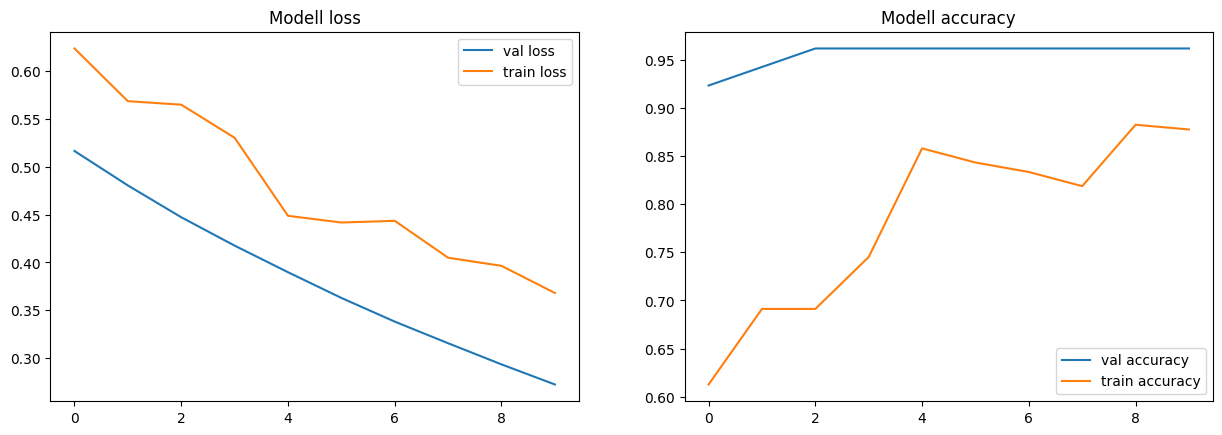

In [ ]:
hist=plot_history(hostory)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


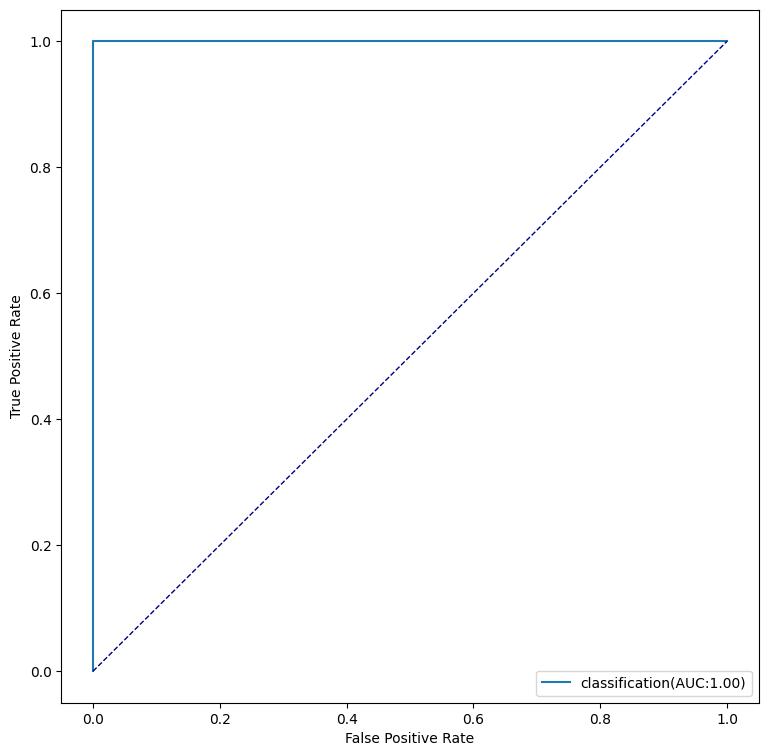

In [ ]:

plot_auc(y_test,model.predict(x_test,verbose=True))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


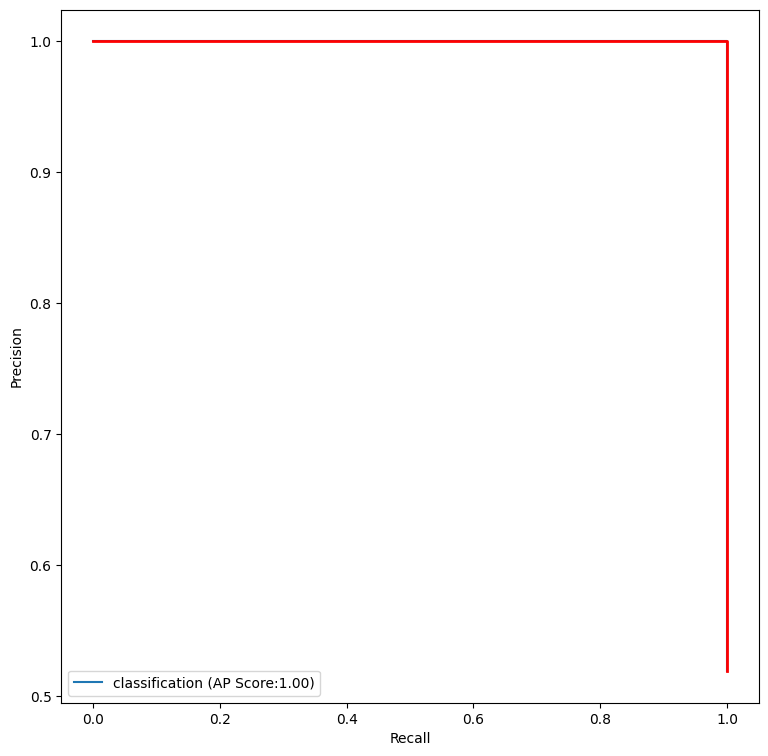

In [ ]:
plot_precision_recall_curve_helper(y_test,model.predict(x_test,verbose=True))

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

def calc_f1(prec, recall):
    return 2 * (prec * recall) / (prec + recall) if recall and prec else 0

# Assuming y_test and model are already defined
precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose=True))

# Calculate F1 scores for each threshold
f1_scores = [calc_f1(precision[i], recall[i]) for i in range(len(thresholds))]

# Find the index of the maximum F1 score
idx = np.argmax(f1_scores)
optimal_threshold = thresholds[idx]

# Output the metrics at the optimal threshold
print('Precision:', precision[idx])
print('Recall:', recall[idx])
print('Threshold:', optimal_threshold)
print('F1 Score:', f1_scores[idx])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Precision: 1.0
Recall: 1.0
Threshold: 0.70764285
F1 Score: 1.0


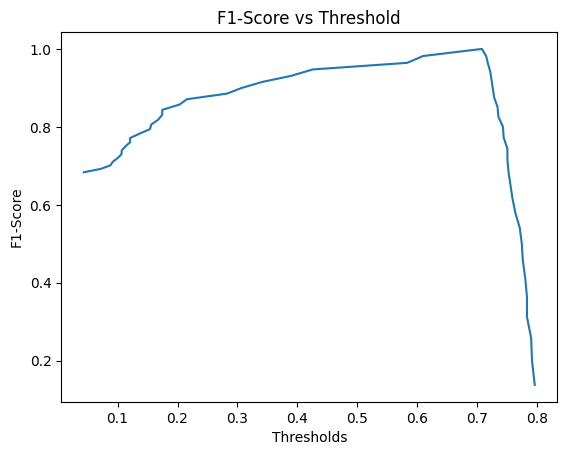

In [ ]:
import matplotlib.pyplot as plt

# Ensure f1_scores and thresholds are correctly defined in previous steps
plt.figure()
plt.plot(thresholds, f1_scores)  # Changed 'fiscore' to 'f1_scores'
plt.title("F1-Score vs Threshold")
plt.xlabel("Thresholds")
plt.ylabel("F1-Score")
plt.show()
